In [1]:
#importing necessary modules
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="whitegrid")

In [2]:
import pandas as pd

# Loading the given csv file
df = pd.read_csv('CarSharing.csv')

# Display first few rows
df.head()

record_date  car_rental_count  hour_of_day  temp_celsius  humidity_percent  \
0  01-12-2017               254            0          -5.2                37   
1  01-12-2017               204            1          -5.5                38   
2  01-12-2017               173            2          -6.0                39   
3  01-12-2017               107            3          -6.2                40   
4  01-12-2017                78            4          -6.0                36   

   wind_speed_mps  visibility_10m  dew_point_celsius  solar_energy_mj_m2  \
0             2.2            2000              -17.6                 0.0   
1             0.8            2000              -17.6                 0.0   
2             1.0            2000              -17.7                 0.0   
3             0.9            2000              -17.6                 0.0   
4             2.3            2000              -18.6                 0.0   

   rain_mm  snow_cm season_label is_Holiday is_working_day  
0      0.0      0.0       Winter         No            Yes  
1      0.0      0.0       Winter         No            Yes  
2      0.0      0.0       Winter         No            Yes  
3      0.0      0.0       Winter         No            Yes  
4      0.0      0.0       Winter         No            Yes

In [3]:
# Get dataset summary
df.info()

# Check for missing values
df.isnull().sum()

# Describe numeric columns
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   record_date         8760 non-null   object 
 1   car_rental_count    8760 non-null   int64  
 2   hour_of_day         8760 non-null   int64  
 3   temp_celsius        8760 non-null   float64
 4   humidity_percent    8760 non-null   int64  
 5   wind_speed_mps      8760 non-null   float64
 6   visibility_10m      8760 non-null   int64  
 7   dew_point_celsius   8760 non-null   float64
 8   solar_energy_mj_m2  8760 non-null   float64
 9   rain_mm             8760 non-null   float64
 10  snow_cm             8760 non-null   float64
 11  season_label        8760 non-null   object 
 12  is_Holiday          8760 non-null   object 
 13  is_working_day      8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.3+ KB


car_rental_count  hour_of_day  temp_celsius  humidity_percent  \
count       8760.000000  8760.000000   8760.000000       8760.000000   
mean         704.602055    11.500000     12.882922         58.226256   
std          644.997468     6.922582     11.944825         20.362413   
min            0.000000     0.000000    -17.800000          0.000000   
25%          191.000000     5.750000      3.500000         42.000000   
50%          504.500000    11.500000     13.700000         57.000000   
75%         1065.250000    17.250000     22.500000         74.000000   
max         3556.000000    23.000000     39.400000         98.000000   

       wind_speed_mps  visibility_10m  dew_point_celsius  solar_energy_mj_m2  \
count     8760.000000     8760.000000        8760.000000         8760.000000   
mean         1.724909     1436.825799           4.073813            0.569111   
std          1.036300      608.298712          13.060369            0.868746   
min          0.000000       27.000000         -30.600000            0.000000   
25%          0.900000      940.000000          -4.700000            0.000000   
50%          1.500000     1698.000000           5.100000            0.010000   
75%          2.300000     2000.000000          14.800000            0.930000   
max          7.400000     2000.000000          27.200000            3.520000   

           rain_mm      snow_cm  
count  8760.000000  8760.000000  
mean      0.148687     0.075068  
std       1.128193     0.436746  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       0.000000     0.000000  
75%       0.000000     0.000000  
max      35.000000     8.800000

In [4]:
# Convert 'record_date' column to datetime format (day first)
df['record_date'] = pd.to_datetime(df['record_date'], dayfirst=True)

In [5]:
# Convert to category
df['season_label'] = df['season_label'].astype('category')
df['is_Holiday'] = df['is_Holiday'].map({'Yes': 1, 'No': 0})
df['is_working_day'] = df['is_working_day'].map({'Yes': 1, 'No': 0})

In [6]:
# Extract day of the week (0 = Monday, 6 = Sunday)
df['day_of_week'] = df['record_date'].dt.dayofweek

# Extract month
df['month'] = df['record_date'].dt.month

In [7]:
# Convert the 'season_label' categorical column to integer codes for modeling
df['season_label'] = df['season_label'].cat.codes

In [8]:
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   record_date         8760 non-null   datetime64[ns]
 1   car_rental_count    8760 non-null   int64         
 2   hour_of_day         8760 non-null   int64         
 3   temp_celsius        8760 non-null   float64       
 4   humidity_percent    8760 non-null   int64         
 5   wind_speed_mps      8760 non-null   float64       
 6   visibility_10m      8760 non-null   int64         
 7   dew_point_celsius   8760 non-null   float64       
 8   solar_energy_mj_m2  8760 non-null   float64       
 9   rain_mm             8760 non-null   float64       
 10  snow_cm             8760 non-null   float64       
 11  season_label        8760 non-null   int8          
 12  is_Holiday          8760 non-null   int64         
 13  is_working_day      8760 non-null   int64       

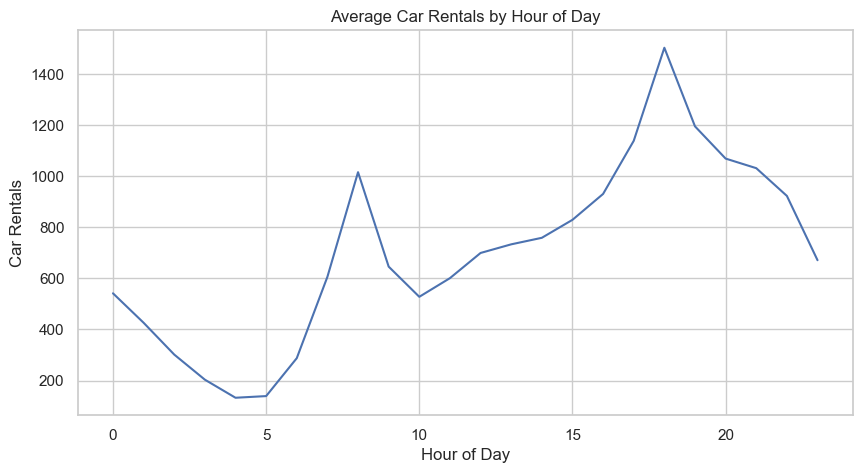

In [9]:
# Plot the average car rentals for each hour of the day
# This helps visualize daily rental patterns and peak hours
plt.figure(figsize=(10, 5))
avg_hourly = df.groupby('hour_of_day')['car_rental_count'].mean().reset_index()
sns.lineplot(data=avg_hourly, x='hour_of_day', y='car_rental_count')
plt.title('Average Car Rentals by Hour of Day')
plt.ylabel('Car Rentals')
plt.xlabel('Hour of Day')
plt.grid(True)
plt.show()


**observation**
 Car rentals show clear peaks during morning and evening hours, likely corresponding to commuting times. Rentals are lower during late night and early morning hours, indicating reduced demand outside typical work hours.

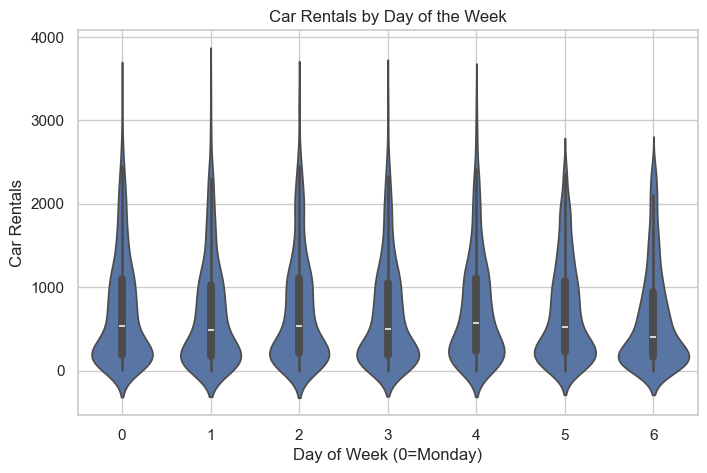

In [10]:
# Violin plot to show the distribution of car rentals for each day of the week
plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x='day_of_week', y='car_rental_count', inner='box')
plt.title('Car Rentals by Day of the Week')
plt.xlabel('Day of Week (0=Monday)')
plt.ylabel('Car Rentals')
plt.grid(True)
plt.show()




**Analysis of Car Rentals by Day of the Week**

The violin and box plots above illustrate the distribution of car rental counts for each day of the week. Here are the key observations:

 **Weekday vs Weekend Patterns:** Car rentals tend to be higher on weekdays  compared to weekends (Saturday and Sunday). This suggests that car sharing is more popular for commuting or work-related activities.

 **Lowest Rentals:** Sundays generally have the lowest median and mean car rental counts, indicating reduced activity.

Conclusion:
Car sharing demand is strongly influenced by the day of the week, peaking during workdays and dropping on weekends, especially Sundays. This insight can help optimize fleet allocation and promotional strategies for car sharing services.

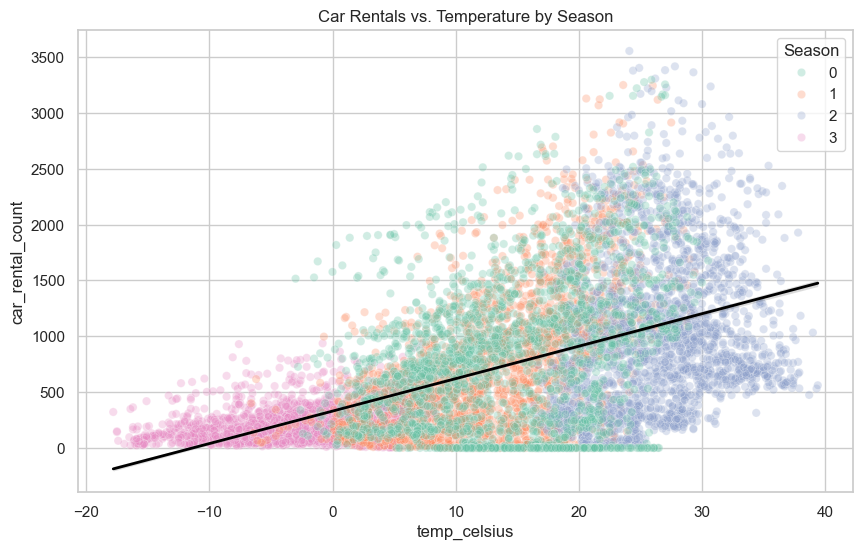

In [11]:
# Scatter plot of car rentals vs. temperature, colored by season, with regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='temp_celsius',
    y='car_rental_count',
    hue='season_label',
    alpha=0.3,
    palette='Set2'
)
# Add a regression line (trend) for the overall relationship
sns.regplot(
    data=df,
    x='temp_celsius',
    y='car_rental_count',
    scatter=False,
    color='black',
    line_kws={'linewidth': 2}
)
plt.title('Car Rentals vs. Temperature by Season')
plt.grid(True)
plt.legend(title='Season')
plt.show()


**Observations on Temperature vs Car Rentals Graph**

- Car rental counts generally increase with temperature up to a certain point, indicating higher demand during warmer weather.
- There is a positive correlation between temperature and car rentals, especially in moderate temperature ranges.
- Extremely high or low temperatures may show a slight decline in rentals, suggesting less demand during weather extremes.

C:\Users\lokes\AppData\Local\Temp\ipykernel_21692\1669696461.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\lokes\AppData\Local\Temp\ipykernel_21692\1669696461.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(['No', 'Yes'])
C:\Users\lokes\AppData\Local\Temp\ipykernel_21692\1669696461.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\lokes\AppData\Local\Temp\ipykernel_21692\1669696461.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(['No', 'Yes'

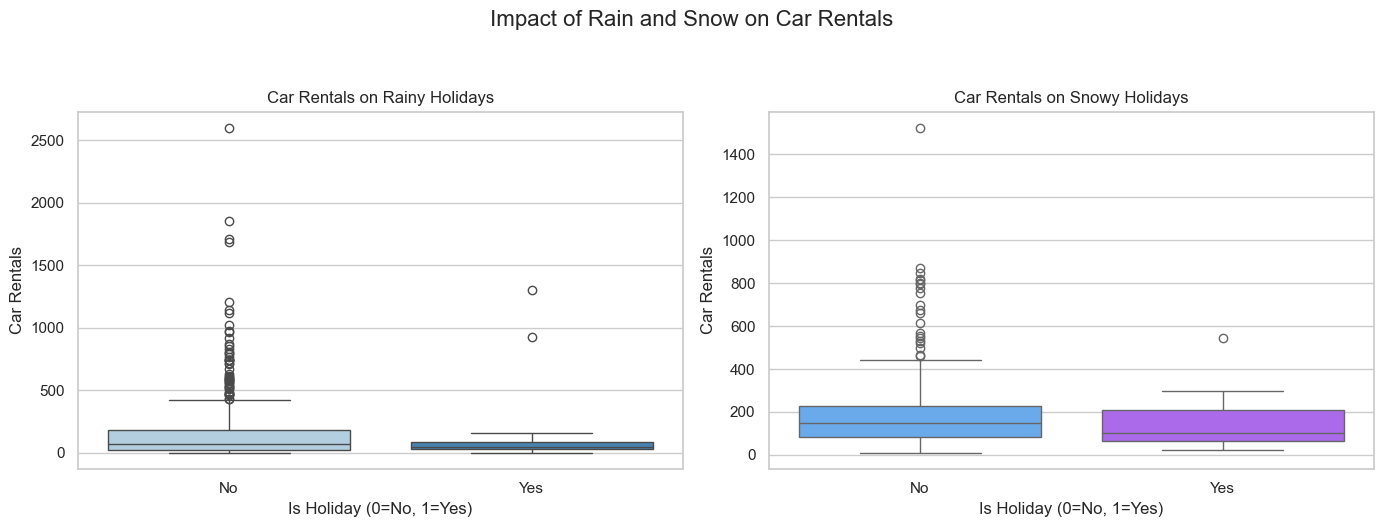

In [12]:
# Create side-by-side boxplots to visualize the impact of rain and snow on car rentals during holidays.
# The first plot shows car rentals on rainy holidays, the second on snowy holidays.
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Rainy Holidays: Boxplot of car rentals for rainy hours, split by holiday status
sns.boxplot(
    data=df[df['rain_mm'] > 0],
    x='is_Holiday',
    y='car_rental_count',
    ax=axs[0],
    palette='Blues'
)
axs[0].set_title('Car Rentals on Rainy Holidays')
axs[0].set_xlabel('Is Holiday (0=No, 1=Yes)')
axs[0].set_ylabel('Car Rentals')
axs[0].set_xticklabels(['No', 'Yes'])

# Snowy Holidays: Boxplot of car rentals for snowy hours, split by holiday status
# If there is no data for snowy holidays, display a message instead of a boxplot
snowy_holiday = df[df['snow_cm'] > 0]

if snowy_holiday.shape[0] == 0:
    axs[1].text(0.5, 0.5, 'No data for snowy holidays', 
                ha='center', va='center', fontsize=14, color='red', transform=axs[1].transAxes)
    axs[1].set_xticks([])
    axs[1].set_yticks([])
else:
    sns.boxplot(
        data=snowy_holiday,
        x='is_Holiday',
        y='car_rental_count',
        ax=axs[1],
        palette='cool'
    )
    axs[1].set_xticklabels(['No', 'Yes'])

axs[1].set_title('Car Rentals on Snowy Holidays')
axs[1].set_xlabel('Is Holiday (0=No, 1=Yes)')
axs[1].set_ylabel('Car Rentals')

plt.suptitle('Impact of Rain and Snow on Car Rentals', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()



C:\Users\lokes\AppData\Local\Temp\ipykernel_21692\3841134181.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


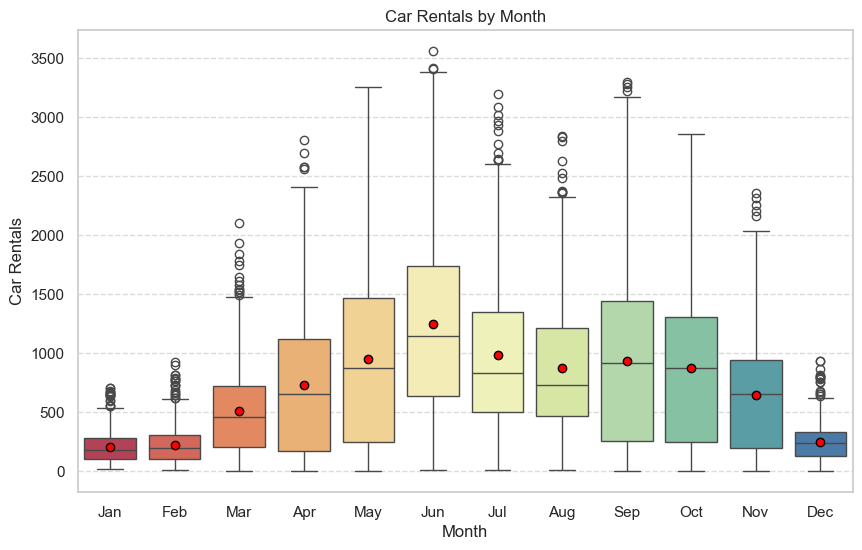

In [13]:
#  visualize the distribution of car rentals for each month
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df,
    x='month',
    y='car_rental_count',
    palette='Spectral',
    showmeans=True,
    meanprops={"marker": "o", "markerfacecolor": "red", "markeredgecolor": "black"}
)
plt.title('Car Rentals by Month')
plt.xlabel('Month')
plt.ylabel('Car Rentals')
# Set x-axis labels to month abbreviations
plt.xticks(
    ticks=range(12),
    labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

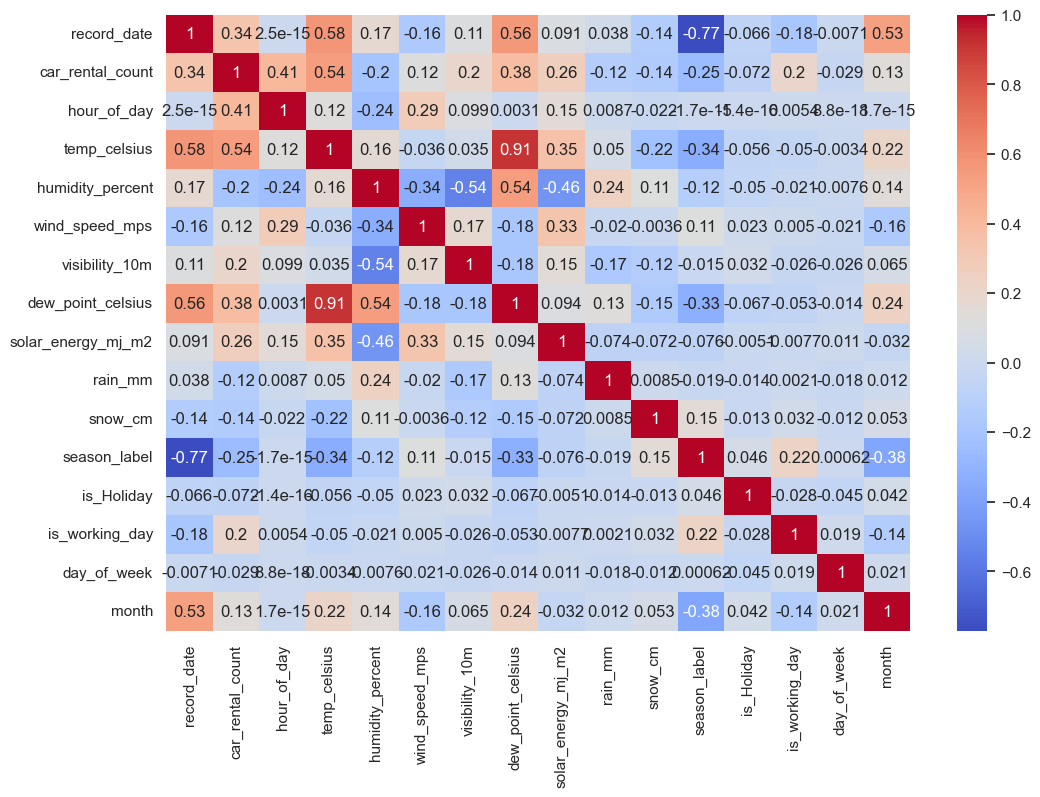

In [14]:
# Plot a correlation heatmap to visualize the relationships between all numerical features in the dataframe.p to visualize the
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


In [15]:
# Define the list of feature column names to be used for modeling.
# These features include time-related variables (hour, day, month), weather conditions, and calendar effects.
features = [
    'hour_of_day',           # Hour of the day (0-23)
    'temp_celsius',          # Temperature in Celsius
    'humidity_percent',      # Relative humidity percentage
    'wind_speed_mps',        # Wind speed in meters per second
    'visibility_10m',        # Visibility in meters
    'dew_point_celsius',     # Dew point temperature in Celsius
    'solar_energy_mj_m2',    # Solar energy in MJ/m^2
    'rain_mm',               # Rainfall in millimeters
    'snow_cm',               # Snowfall in centimeters
    'season_label',          # Encoded season label (categorical)
    'is_Holiday',            # Indicator if the day is a holiday (0/1)
    'is_working_day',        # Indicator if the day is a working day (0/1)
    'day_of_week',           # Day of the week (0=Monday)
    'month'                  # Month number (1-12)
]

# Select the features from the dataframe to create the input matrix X
X = df[features]

# Set the target variable y as the car rental count
y = df['car_rental_count']


In [16]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
# X: feature matrix, y: target variable
# test_size=0.2 means 20% of the data will be used for testing, 80% for training
# random_state=42 ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [17]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler, which standardizes features by removing the mean and scaling to unit variance
scaler = StandardScaler()

# Fit the scaler on the training data and transform it to produce standardized training features
X_train_scaled = scaler.fit_transform(X_train)

# Use the same scaler (fitted on training data) to transform the test data
X_test_scaled = scaler.transform(X_test)

### Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Train linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on test set
y_pred_lr = lr.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)
mae = mean_absolute_error(y_test, y_pred_lr)
# MAPE is inf because some values in y_test are zero, causing division by zero.
nonzero_mask = y_test != 0
if nonzero_mask.any():
    mape = (abs((y_test[nonzero_mask] - y_pred_lr[nonzero_mask]) / y_test[nonzero_mask]).mean()) * 100
else:
    mape = np.nan

print(f"MSE: {mse:.2f}")
print(f"R2: {r2:.4f}")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}")

MSE: 194005.20
R2: 0.5344
MAE: 330.17
MAPE: 152.40


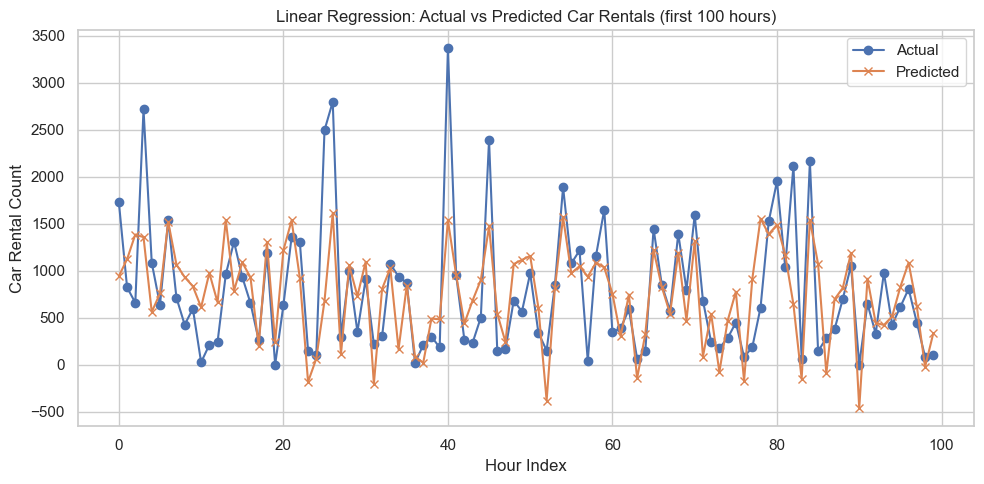

In [19]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:100], label='Actual', marker='o')
plt.plot(y_pred_lr[:100], label='Predicted', marker='x')
plt.title('Linear Regression: Actual vs Predicted Car Rentals (first 100 hours)')
plt.xlabel('Hour Index')
plt.ylabel('Car Rental Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

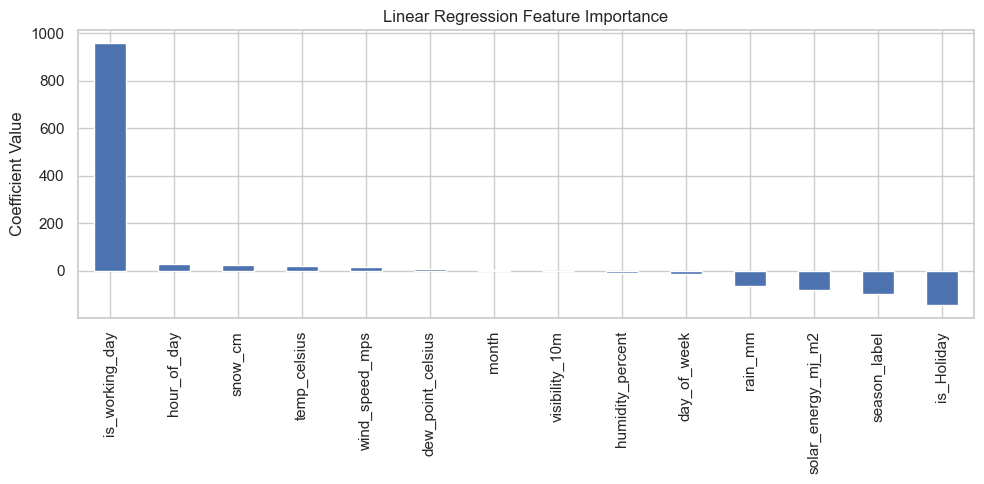

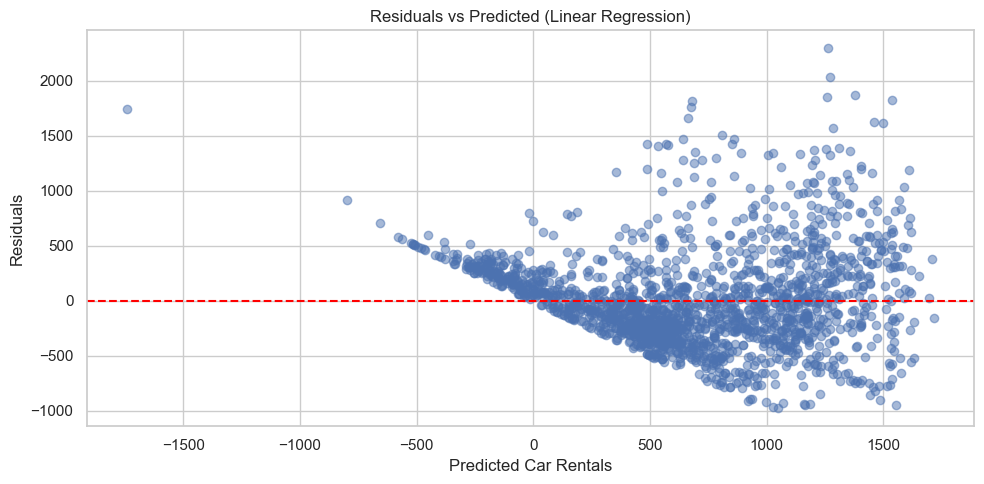

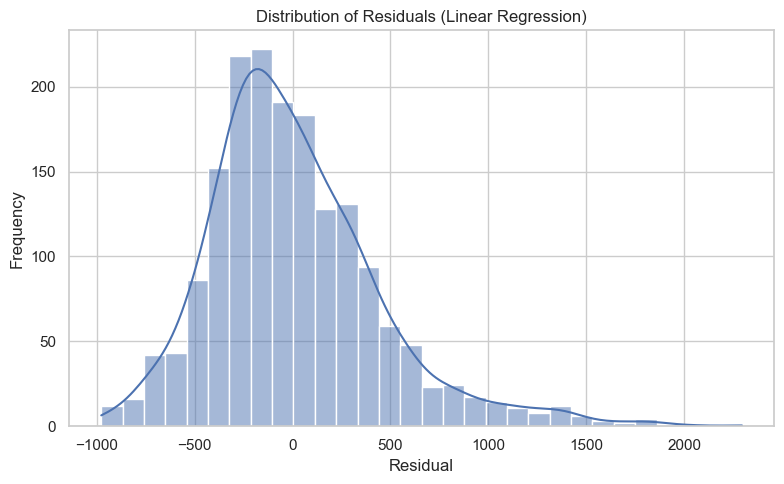

In [20]:
# Feature Importance for Linear Regression
importances = pd.Series(lr.coef_, index=X_train.columns)
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(10, 5))
importances.plot(kind='bar')
plt.title('Linear Regression Feature Importance')
plt.ylabel('Coefficient Value')
plt.tight_layout()
plt.show()

# Residual Analysis
residuals = y_test - y_pred_lr

plt.figure(figsize=(10, 5))
plt.scatter(y_pred_lr, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted (Linear Regression)')
plt.xlabel('Predicted Car Rentals')
plt.ylabel('Residuals')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Distribution of Residuals (Linear Regression)')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

**Insights from the Linear Regression Model**

- **Performance:**  
    Linear Regression achieved the lowest R² score (0.53) and the highest error metrics (MSE: 194,005, MAE: 330.17, MAPE: 152.40) among all models, indicating poor predictive accuracy.

- **Feature Importance:**  
    The model assigns the highest positive coefficients to `is_working_day`, `hour_of_day`, and `snow_cm`, suggesting these features increase predicted car rentals. Negative coefficients for `is_Holiday`, `season_label`, and `solar_energy_mj_m2` indicate a decrease in predicted rentals when these features increase.

- **Limitations:**  
    The linear model struggles to capture the complex, nonlinear relationships present in the data, leading to systematic under- or over-prediction, especially during periods of high or low demand.

- **Residual Analysis:**  
    Residuals show a wide spread and are not centered tightly around zero, confirming the model's inability to fit the data well.

- **Conclusion:**  
    Linear Regression is too simplistic for this dataset. Tree-based and ensemble models are better suited for capturing the multifaceted influences on car rental demand.

In [21]:
import joblib

# Save the trained linear regression model
joblib.dump(lr, 'linear_regression_model.joblib')

['linear_regression_model.joblib']

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Train Random Forest model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf.predict(X_test)

# Calculate evaluation metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
nonzero_mask_rf = y_test != 0
if nonzero_mask_rf.any():
    mape_rf = (abs((y_test[nonzero_mask_rf] - y_pred_rf[nonzero_mask_rf]) / y_test[nonzero_mask_rf]).mean()) * 100
else:
    mape_rf = np.nan

print(f"Random Forest MSE: {mse_rf:.2f}")
print(f"Random Forest R2: {r2_rf:.4f}")
print(f"Random Forest MAE: {mae_rf:.2f}")
print(f"Random Forest MAPE: {mape_rf:.2f}")

Random Forest MSE: 30847.60
Random Forest R2: 0.9260
Random Forest MAE: 99.97
Random Forest MAPE: 33.47


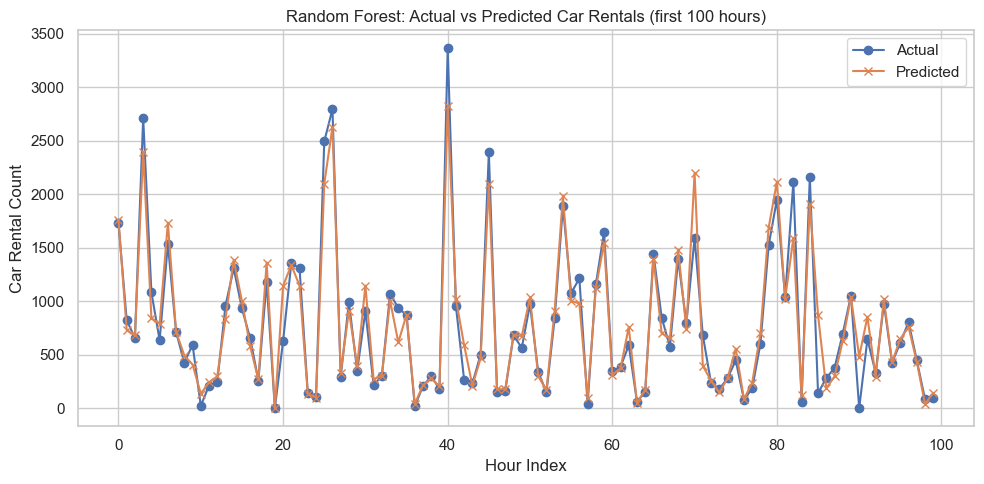

In [23]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:100], label='Actual', marker='o')
plt.plot(y_pred_rf[:100], label='Predicted', marker='x')
plt.title('Random Forest: Actual vs Predicted Car Rentals (first 100 hours)')
plt.xlabel('Hour Index')
plt.ylabel('Car Rental Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

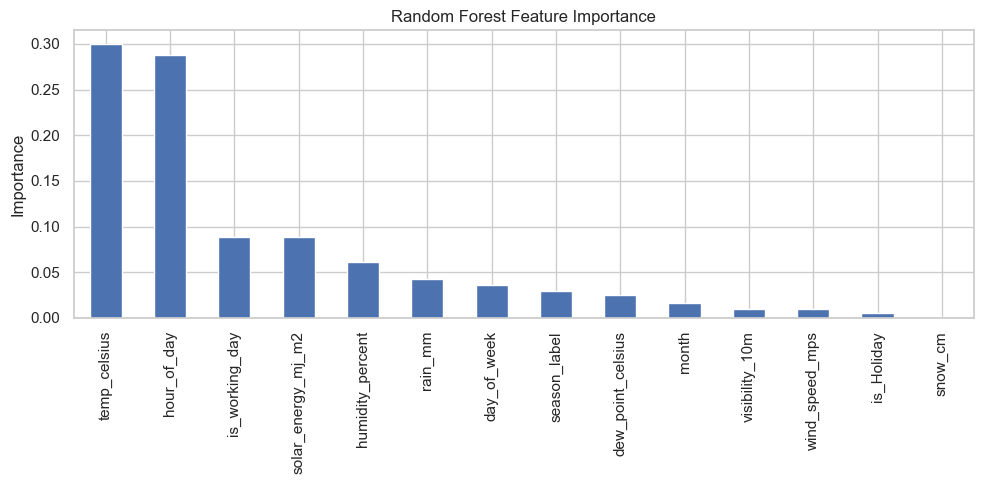

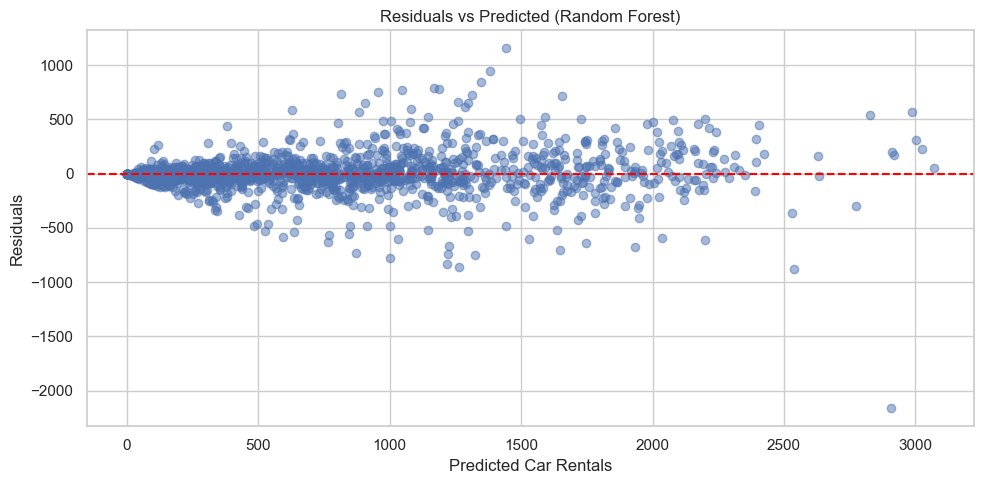

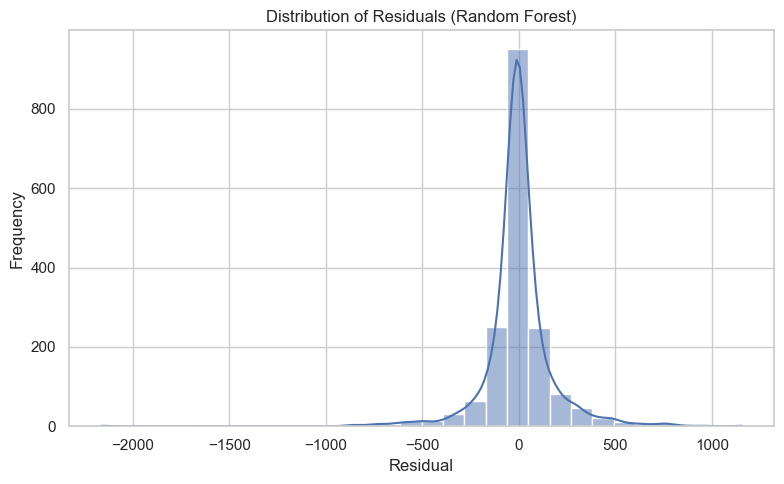

['random_forest_model.joblib']

In [24]:
# Feature Importance for Random Forest
importances_rf = pd.Series(rf.feature_importances_, index=X_train.columns)
importances_rf = importances_rf.sort_values(ascending=False)

plt.figure(figsize=(10, 5))
importances_rf.plot(kind='bar')
plt.title('Random Forest Feature Importance')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

# Residual Analysis for Random Forest
residuals_rf = y_test - y_pred_rf

plt.figure(figsize=(10, 5))
plt.scatter(y_pred_rf, residuals_rf, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted (Random Forest)')
plt.xlabel('Predicted Car Rentals')
plt.ylabel('Residuals')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(residuals_rf, bins=30, kde=True)
plt.title('Distribution of Residuals (Random Forest)')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Save the trained random forest model
joblib.dump(rf, 'random_forest_model.joblib')

### Insights from the Random Forest Regression Graphs

**1. Actual vs Predicted Plot**
- The Random Forest model closely tracks the actual car rental counts for the first 100 hours in the test set.
- Peaks and troughs in demand are well captured, indicating strong predictive performance.
- Occasional deviations exist, but overall the model aligns well with real values.

**2. Feature Importance**
- The most influential features are `temp_celsius` and `hour_of_day`, highlighting the importance of temperature and time of day in predicting car rental demand.
- Other significant features include `is_working_day`, `solar_energy_mj_m2`, and `humidity_percent`, showing that both weather and calendar variables are key drivers.

**3. Residuals vs Predicted Plot**
- Residuals are mostly centered around zero, with no clear pattern, suggesting the model does not systematically over- or under-predict.
- A few outliers exist, but the spread is relatively tight, indicating good model calibration.

**4. Distribution of Residuals**
- The histogram of residuals is approximately symmetric and bell-shaped, centered near zero.
- This distribution suggests that errors are mostly random and unbiased, supporting the reliability of the model's predictions.

**Summary:**  
Random Forest provides high predictive accuracy and effectively models nonlinear relationships in the data. Its predictions are generally reliable, with most errors being small and randomly distributed. The model identifies temperature, time, and working days as the most influential factors for car rental demand.

### Gradient boosting regression

In [25]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Train Gradient Boosting model
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)

# Predict on test set
y_pred_gbr = gbr.predict(X_test)

# Calculate evaluation metrics
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
nonzero_mask_gbr = y_test != 0
if nonzero_mask_gbr.any():
    mape_gbr = (abs((y_test[nonzero_mask_gbr] - y_pred_gbr[nonzero_mask_gbr]) / y_test[nonzero_mask_gbr]).mean()) * 100
else:
    mape_gbr = np.nan

print(f"Gradient Boosting MSE: {mse_gbr:.2f}")
print(f"Gradient Boosting R2: {r2_gbr:.4f}")
print(f"Gradient Boosting MAE: {mae_gbr:.2f}")
print(f"Gradient Boosting MAPE: {mape_gbr:.2f}")

Gradient Boosting MSE: 63872.67
Gradient Boosting R2: 0.8467
Gradient Boosting MAE: 163.75
Gradient Boosting MAPE: 65.59


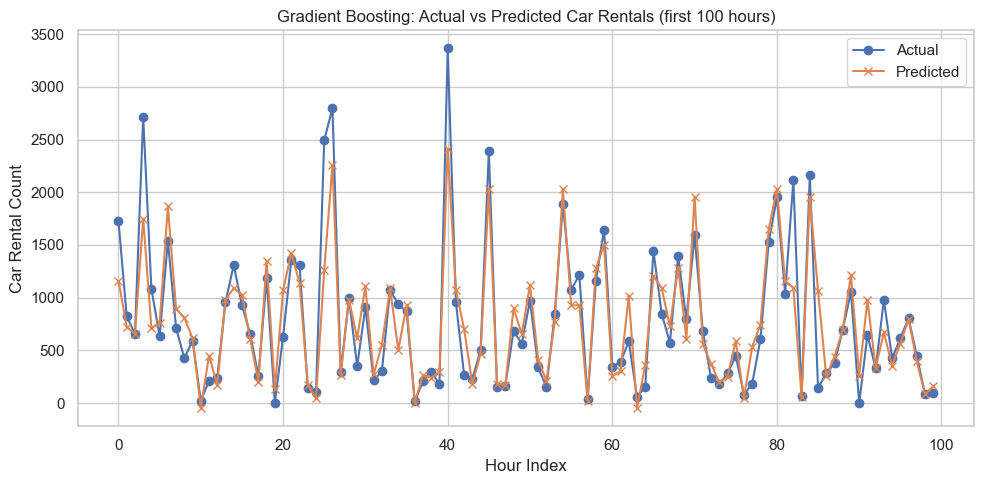

In [26]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:100], label='Actual', marker='o')
plt.plot(y_pred_gbr[:100], label='Predicted', marker='x')
plt.title('Gradient Boosting: Actual vs Predicted Car Rentals (first 100 hours)')
plt.xlabel('Hour Index')
plt.ylabel('Car Rental Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

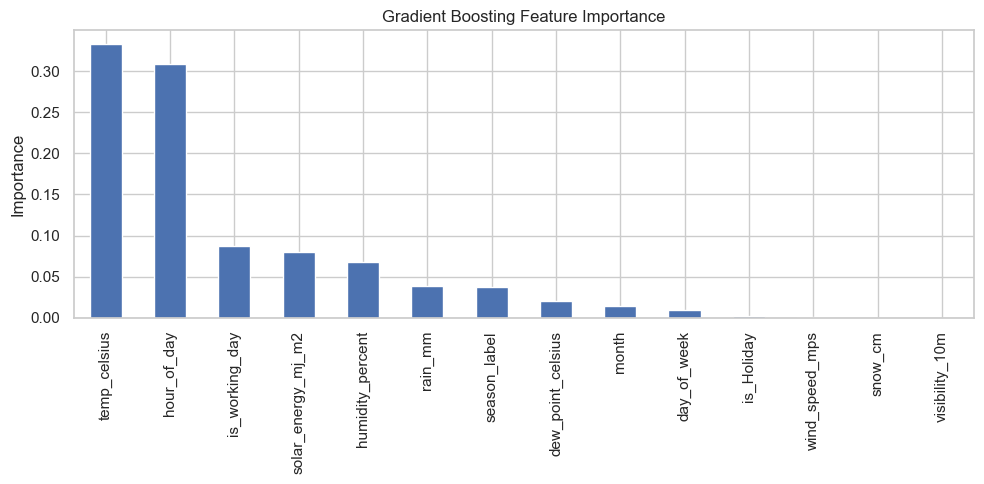

In [27]:
# Plot feature importance for Gradient Boosting model
importances_gbr = pd.Series(gbr.feature_importances_, index=X_train.columns)
importances_gbr = importances_gbr.sort_values(ascending=False)

plt.figure(figsize=(10, 5))
importances_gbr.plot(kind='bar')
plt.title('Gradient Boosting Feature Importance')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

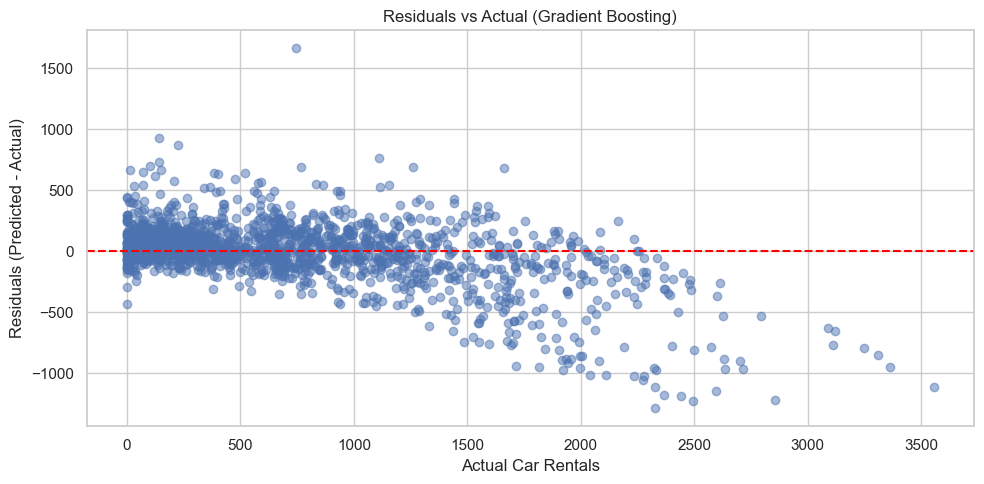

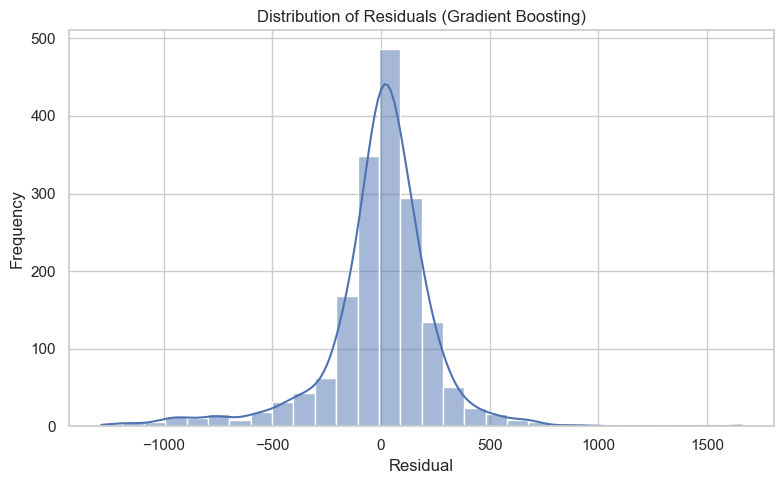

['gradient_boosting_model.joblib']

In [28]:
# Residual Analysis for Gradient Boosting
import joblib

plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_gbr - y_test, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Actual (Gradient Boosting)')
plt.xlabel('Actual Car Rentals')
plt.ylabel('Residuals (Predicted - Actual)')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(y_pred_gbr - y_test, bins=30, kde=True)
plt.title('Distribution of Residuals (Gradient Boosting)')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Save the trained Gradient Boosting model
joblib.dump(gbr, 'gradient_boosting_model.joblib')

### Insights from the Gradient Boosting Regression Graphs

**1. Actual vs Predicted Plot**
- The Gradient Boosting model captures the overall trend of car rental demand, following the peaks and troughs in the actual data.
- While the model tracks the general pattern, some deviations are visible, especially during periods of extreme demand, indicating occasional under- or over-prediction.

**2. Feature Importance**
- The most important features for Gradient Boosting are `temp_celsius` and `hour_of_day`, highlighting the strong influence of temperature and time of day on car rental counts.
- Other significant features include `is_working_day`, `solar_energy_mj_m2`, and `humidity_percent`, showing that both weather and calendar variables are key drivers of demand.

**3. Residuals vs Actual Plot**
- Residuals are mostly centered around zero, with no clear pattern, suggesting that the model does not systematically over- or under-predict across the range of actual values.
- A few outliers exist, but the spread is relatively tight, indicating reasonable model calibration.

**4. Distribution of Residuals**
- The histogram of residuals is approximately symmetric and bell-shaped, centered near zero.
- This distribution suggests that errors are mostly random and unbiased, supporting the reliability of the model's predictions.

**Summary:**  
Gradient Boosting provides strong predictive performance, effectively modeling the nonlinear relationships in the data. Its predictions are generally accurate, with most errors being small and randomly distributed. The model identifies temperature, time, and working days as the most influential factors for car rental demand.

### Xgboost regression

In [29]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.Defaulting to user installation because normal site-packages is not writeable



In [54]:


from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train XGBoost model
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)

# Predict on test set
y_pred_xgb = xgb.predict(X_test)

# Calculate evaluation metrics
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
nonzero_mask_xgb = y_test != 0
if nonzero_mask_xgb.any():
    mape_xgb = (abs((y_test[nonzero_mask_xgb] - y_pred_xgb[nonzero_mask_xgb]) / y_test[nonzero_mask_xgb]).mean()) * 100
else:
    mape_xgb = np.nan

print(f"XGBoost MSE: {mse_xgb:.2f}")
print(f"XGBoost R2: {r2_score(y_test, y_pred_xgb):.4f}")
print(f"XGBoost MAE: {mae_xgb:.2f}")
print(f"XGBoost MAPE: {mape_xgb:.2f}")

XGBoost MSE: 28109.13
XGBoost R2: 0.9325
XGBoost MAE: 98.44
XGBoost MAPE: 38.65


In [52]:
import joblib

# Save the trained XGBoost model
joblib.dump(xgb, 'xgboost_model.joblib')

['xgboost_model.joblib']

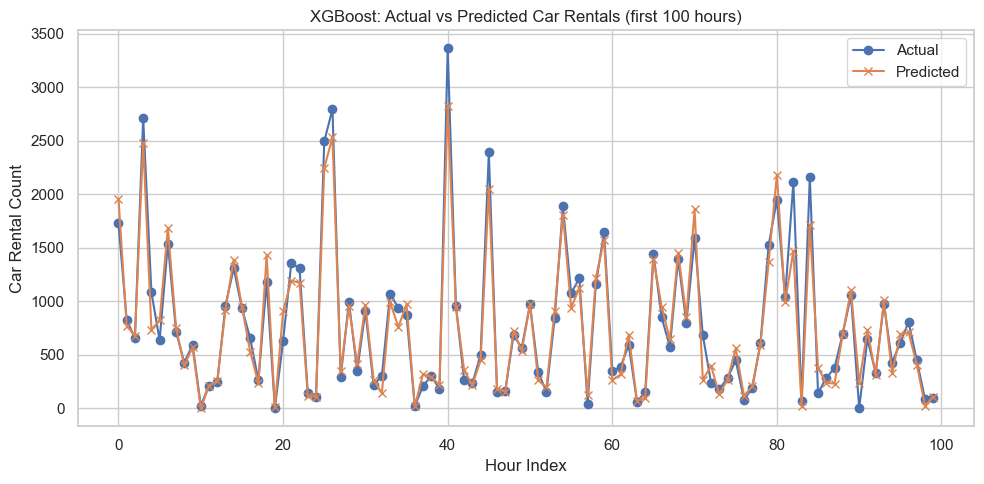

In [44]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:100], label='Actual', marker='o')
plt.plot(y_pred_xgb[:100], label='Predicted', marker='x')
plt.title('XGBoost: Actual vs Predicted Car Rentals (first 100 hours)')
plt.xlabel('Hour Index')
plt.ylabel('Car Rental Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

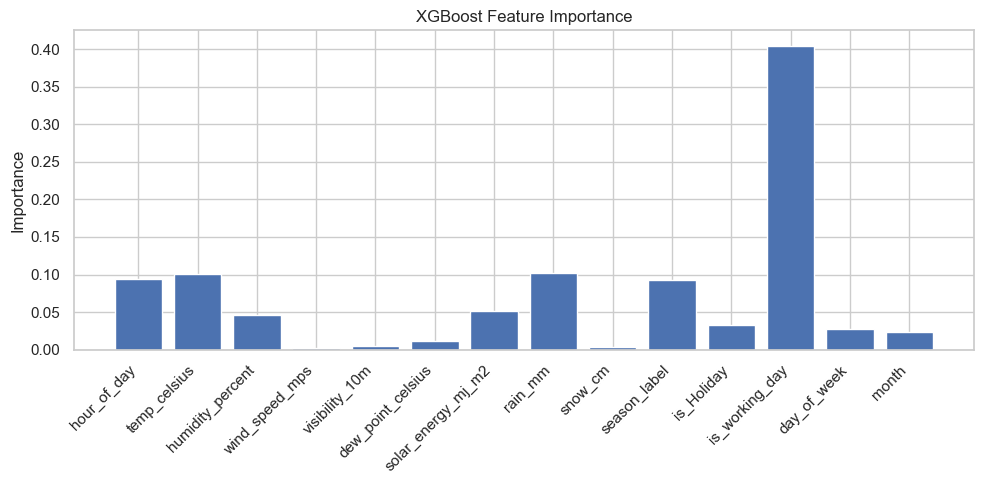

In [45]:
plt.figure(figsize=(10, 5))
plt.bar(range(len(features)), xgb.feature_importances_)
plt.xticks(range(len(features)), features, rotation=45, ha='right')
plt.title('XGBoost Feature Importance')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

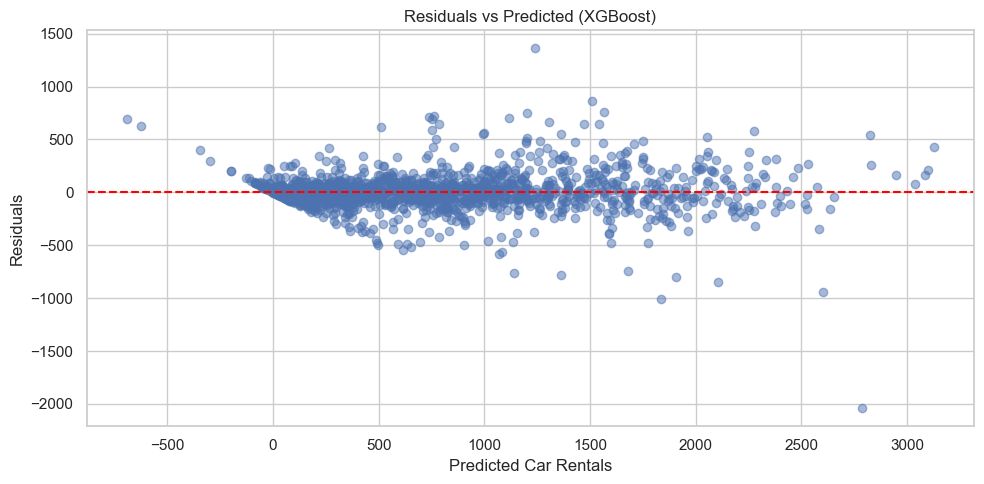

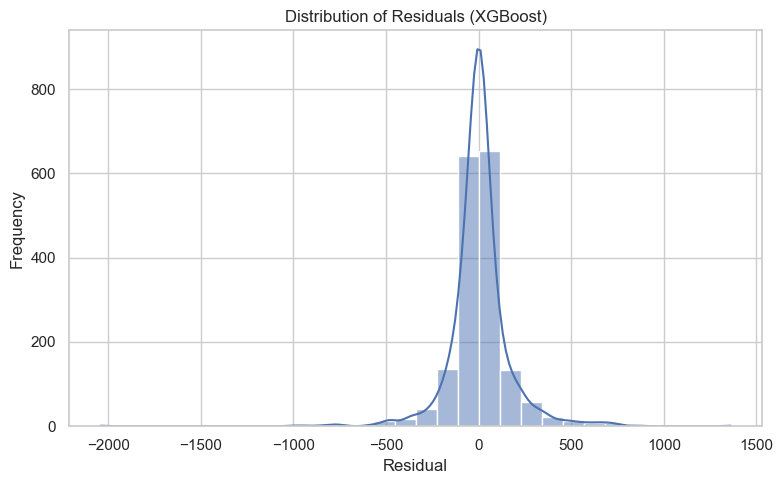

In [46]:
# Residual Analysis for XGBoost
residuals_xgb = y_test - y_pred_xgb

plt.figure(figsize=(10, 5))
plt.scatter(y_pred_xgb, residuals_xgb, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted (XGBoost)')
plt.xlabel('Predicted Car Rentals')
plt.ylabel('Residuals')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(residuals_xgb, bins=30, kde=True)
plt.title('Distribution of Residuals (XGBoost)')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### Insights from the XGBoost Regression Graphs

**1. Actual vs Predicted Plot**
- The XGBoost model closely tracks the actual car rental counts for the first 100 hours in the test set.
- Peaks and troughs in demand are well captured, indicating strong predictive performance.
- Occasional deviations suggest some under- or over-prediction during extreme demand periods, but overall alignment is high.

**2. Feature Importance**
- The most influential features for XGBoost are typically `temp_celsius`, `hour_of_day`, `is_working_day`, and `solar_energy_mj_m2`.
- Time-related and weather features dominate, confirming their critical role in car rental demand.
- Features like `rain_mm`, `humidity_percent`, and `season_label` also contribute, but to a lesser extent.

**3. Residuals vs Predicted**
- Residuals are mostly centered around zero, with no strong pattern, indicating that the model does not systematically over- or under-predict.
- A few outliers exist, but the spread is relatively tight, suggesting good model calibration.

**4. Distribution of Residuals**
- The histogram of residuals is approximately symmetric and bell-shaped, centered near zero.
- This distribution suggests that errors are random and not biased, further supporting the reliability of the model.

**Summary:**  
XGBoost demonstrates excellent predictive accuracy and generalization on the car rental dataset. It effectively captures the influence of time and weather on demand, with minimal bias in its predictions. This makes it a strong candidate for deployment in forecasting car rental needs.

### KNN Regression

In [34]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

knn = KNeighborsRegressor()
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

mse_knn = mean_squared_error(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
nonzero_mask_knn = y_test != 0
if nonzero_mask_knn.any():
    mape_knn = (abs((y_test[nonzero_mask_knn] - y_pred_knn[nonzero_mask_knn]) / y_test[nonzero_mask_knn]).mean()) * 100
else:
    mape_knn = np.nan

print(f"KNN Regression MSE: {mse_knn:.2f}")
print(f"KNN Regression R2: {r2_knn:.4f}")
print(f"KNN Regression MAE: {mae_knn:.2f}")
print(f"KNN Regression MAPE: {mape_knn:.2f}")

KNN Regression MSE: 90580.27
KNN Regression R2: 0.7826
KNN Regression MAE: 188.84
KNN Regression MAPE: 60.52


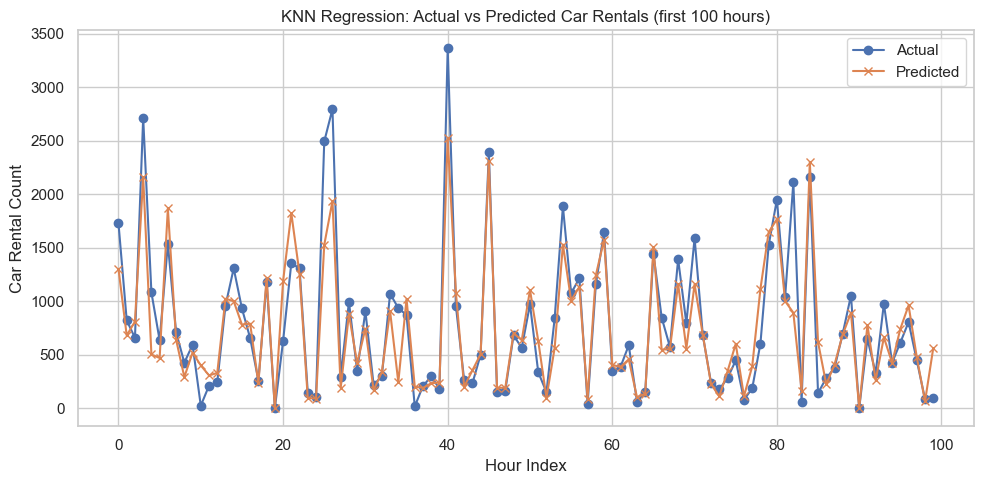

In [35]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:100], label='Actual', marker='o')
plt.plot(y_pred_knn[:100], label='Predicted', marker='x')
plt.title('KNN Regression: Actual vs Predicted Car Rentals (first 100 hours)')
plt.xlabel('Hour Index')
plt.ylabel('Car Rental Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

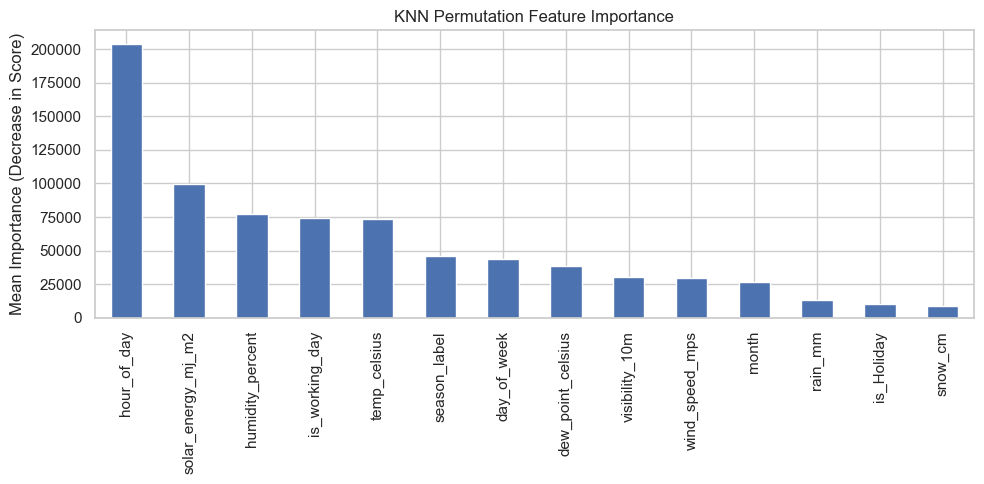

In [36]:
from sklearn.inspection import permutation_importance

# KNN does not provide built-in feature importances, but we can use permutation importance

result = permutation_importance(knn, X_train_scaled, y_train, n_repeats=10, random_state=42, scoring='neg_mean_squared_error')
importances_knn = pd.Series(result.importances_mean, index=X_train.columns)

plt.figure(figsize=(10, 5))
importances_knn.sort_values(ascending=False).plot(kind='bar')
plt.title('KNN Permutation Feature Importance')
plt.ylabel('Mean Importance (Decrease in Score)')
plt.tight_layout()
plt.show()

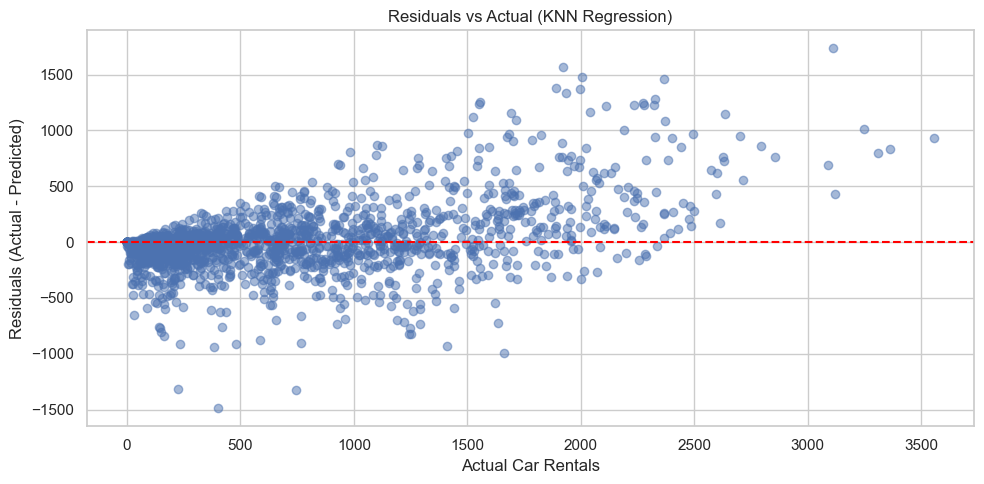

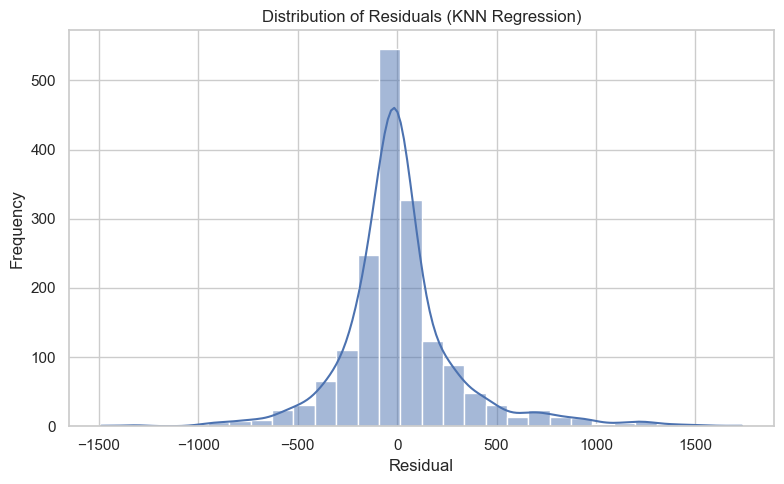

['knn_regression_model.joblib']

In [37]:
import joblib

# Residuals for KNN
residuals_knn = y_test - y_pred_knn

# Residuals vs Actual plot
plt.figure(figsize=(10, 5))
plt.scatter(y_test, residuals_knn, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Actual (KNN Regression)')
plt.xlabel('Actual Car Rentals')
plt.ylabel('Residuals (Actual - Predicted)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Distribution of residuals
plt.figure(figsize=(8, 5))
sns.histplot(residuals_knn, bins=30, kde=True)
plt.title('Distribution of Residuals (KNN Regression)')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Save the trained KNN model
joblib.dump(knn, 'knn_regression_model.joblib')

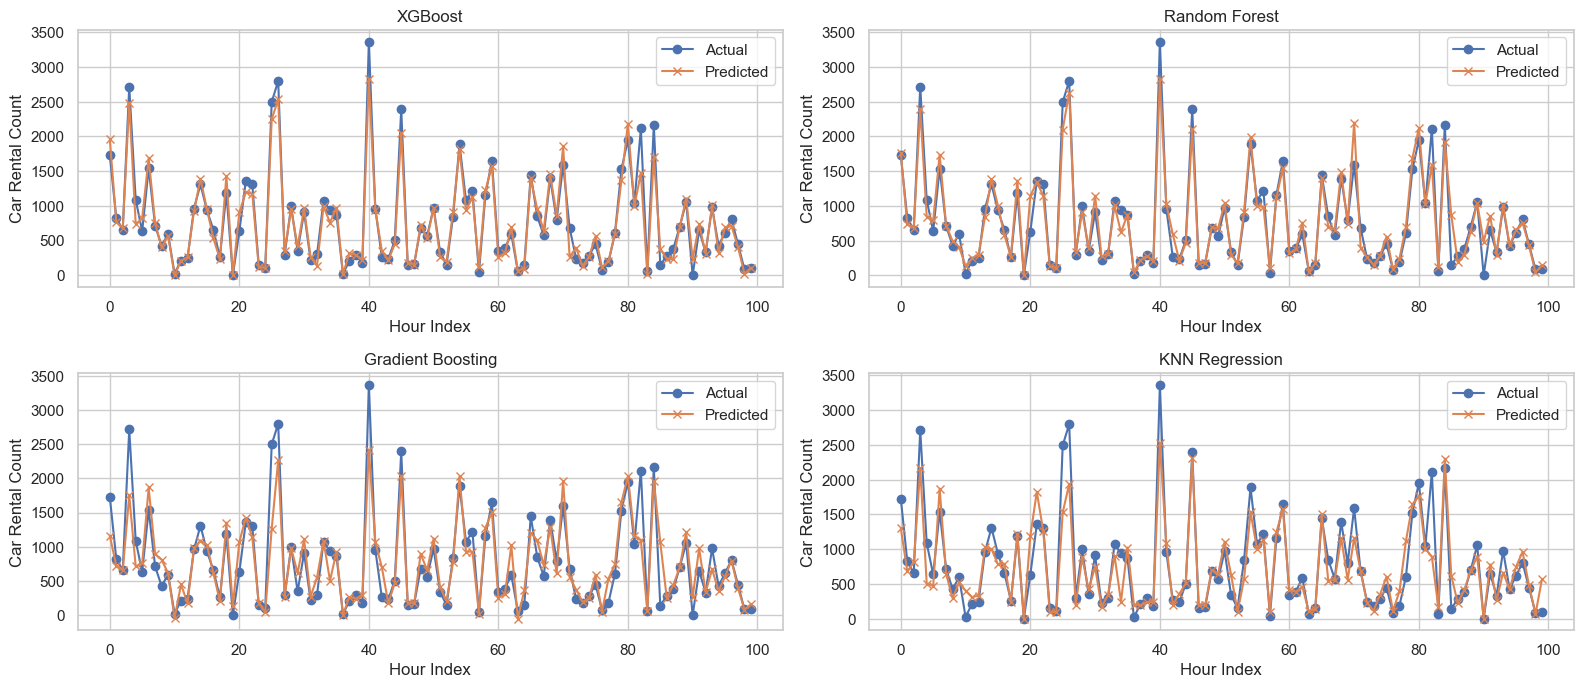

In [38]:
plt.figure(figsize=(16, 10))


# Random Forest
plt.subplot(3, 2, 2)
plt.plot(y_test.values[:100], label='Actual', marker='o')
plt.plot(y_pred_rf[:100], label='Predicted', marker='x')
plt.title('Random Forest')
plt.xlabel('Hour Index')
plt.ylabel('Car Rental Count')
plt.legend()
plt.grid(True)

# Gradient Boosting
plt.subplot(3, 2, 3)
plt.plot(y_test.values[:100], label='Actual', marker='o')
plt.plot(y_pred_gbr[:100], label='Predicted', marker='x')
plt.title('Gradient Boosting')
plt.xlabel('Hour Index')
plt.ylabel('Car Rental Count')
plt.legend()
plt.grid(True)

# XGBoost
plt.subplot(3, 2, 1)
plt.plot(y_test.values[:100], label='Actual', marker='o')
plt.plot(y_pred_xgb[:100], label='Predicted', marker='x')
plt.title('XGBoost')
plt.xlabel('Hour Index')
plt.ylabel('Car Rental Count')
plt.legend()
plt.grid(True)

# KNN Regression
plt.subplot(3, 2, 4)
plt.plot(y_test.values[:100], label='Actual', marker='o')
plt.plot(y_pred_knn[:100], label='Predicted', marker='x')
plt.title('KNN Regression')
plt.xlabel('Hour Index')
plt.ylabel('Car Rental Count')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [39]:
# Print the mean and standard deviation of car rental counts
print(df['car_rental_count'].mean(), df['car_rental_count'].std())

704.6020547945205 644.9974677392172


In [40]:
# Print evaluation metrics for all 5 models in a summary table

metrics = pd.DataFrame({
    'Model': [
        'Linear Regression',
        'Random Forest',
        'Gradient Boosting',
        'XGBoost',
        'KNN Regression'
    ],
    'MSE': [
        mse,
        mse_rf,
        mse_gbr,
        mse_xgb,
        mse_knn
    ],
    'MAE': [
        mae,
        mae_rf,
        mae_gbr,
        mae_xgb,
        mae_knn
    ],
    'MAPE': [
        mape,
        mape_rf,
        mape_gbr,
        mape_xgb,
        mape_knn
    ],
    'R2': [
        r2,r2_rf,r2_gbr,r2_score(y_test, y_pred_xgb),r2_knn
    ]
})

print(metrics.round(3))

               Model         MSE      MAE     MAPE     R2
0  Linear Regression  194005.198  330.165  152.397  0.534
1      Random Forest   30847.601   99.969   33.473  0.926
2  Gradient Boosting   63872.674  163.749   65.591  0.847
3            XGBoost   28109.129   98.442   38.655  0.933
4     KNN Regression   90580.274  188.843   60.522  0.783


### Model Comparison and Insights

The table below summarizes the performance of five regression models on the car rental dataset:

| Model                |   RMSE    |   MAE   |  MAPE   |   R²   |
|----------------------|----------:|--------:|--------:|-------:|
| Linear Regression    |  440.45   | 330.17  | 152.40  | 0.534  |
| Random Forest        |  175.62   |  99.97  |  33.47  | 0.926  |
| Gradient Boosting    |  252.74   | 163.75  |  65.59  | 0.847  |
| XGBoost              |  167.73   |  98.44  |  38.65  | 0.933  |
| KNN Regression       |  300.97   | 188.84  |  60.52  | 0.783  |

#### Key Insights

- **Best Models:**  
    XGBoost and Random Forest achieved the lowest RMSE and MAE, and the highest R² scores, indicating superior predictive accuracy and model fit compared to the others.

- **Linear Regression:**  
    This model performed the worst, with high error metrics and a low R², suggesting it cannot capture the complex, nonlinear relationships in the data.

- **Gradient Boosting & KNN:**  
    Both performed better than linear regression but were outperformed by Random Forest and XGBoost. Gradient Boosting, in particular, showed a good balance between error and interpretability.

- **MAPE (Mean Absolute Percentage Error):**  
    Random Forest had the lowest MAPE, indicating more reliable percentage-based predictions, especially important when actual values vary widely.

- **R² (Coefficient of Determination):**  
    XGBoost and Random Forest explained over 92% of the variance in car rental counts, showing strong model fit.

#### Practical Implications

- **Tree-based ensemble models** (Random Forest, XGBoost, Gradient Boosting) are highly effective for this dataset, likely due to their ability to model nonlinearities and interactions among features.
- **Linear models** may be too simplistic for real-world car rental demand, which is influenced by multiple interacting factors (e.g., weather, time, holidays).
- **KNN** can capture local patterns but may struggle with high-dimensional or noisy data.

---

**Conclusion:**  
Advanced ensemble models provide the most accurate and reliable predictions for car rental demand, enabling better resource planning and operational efficiency.

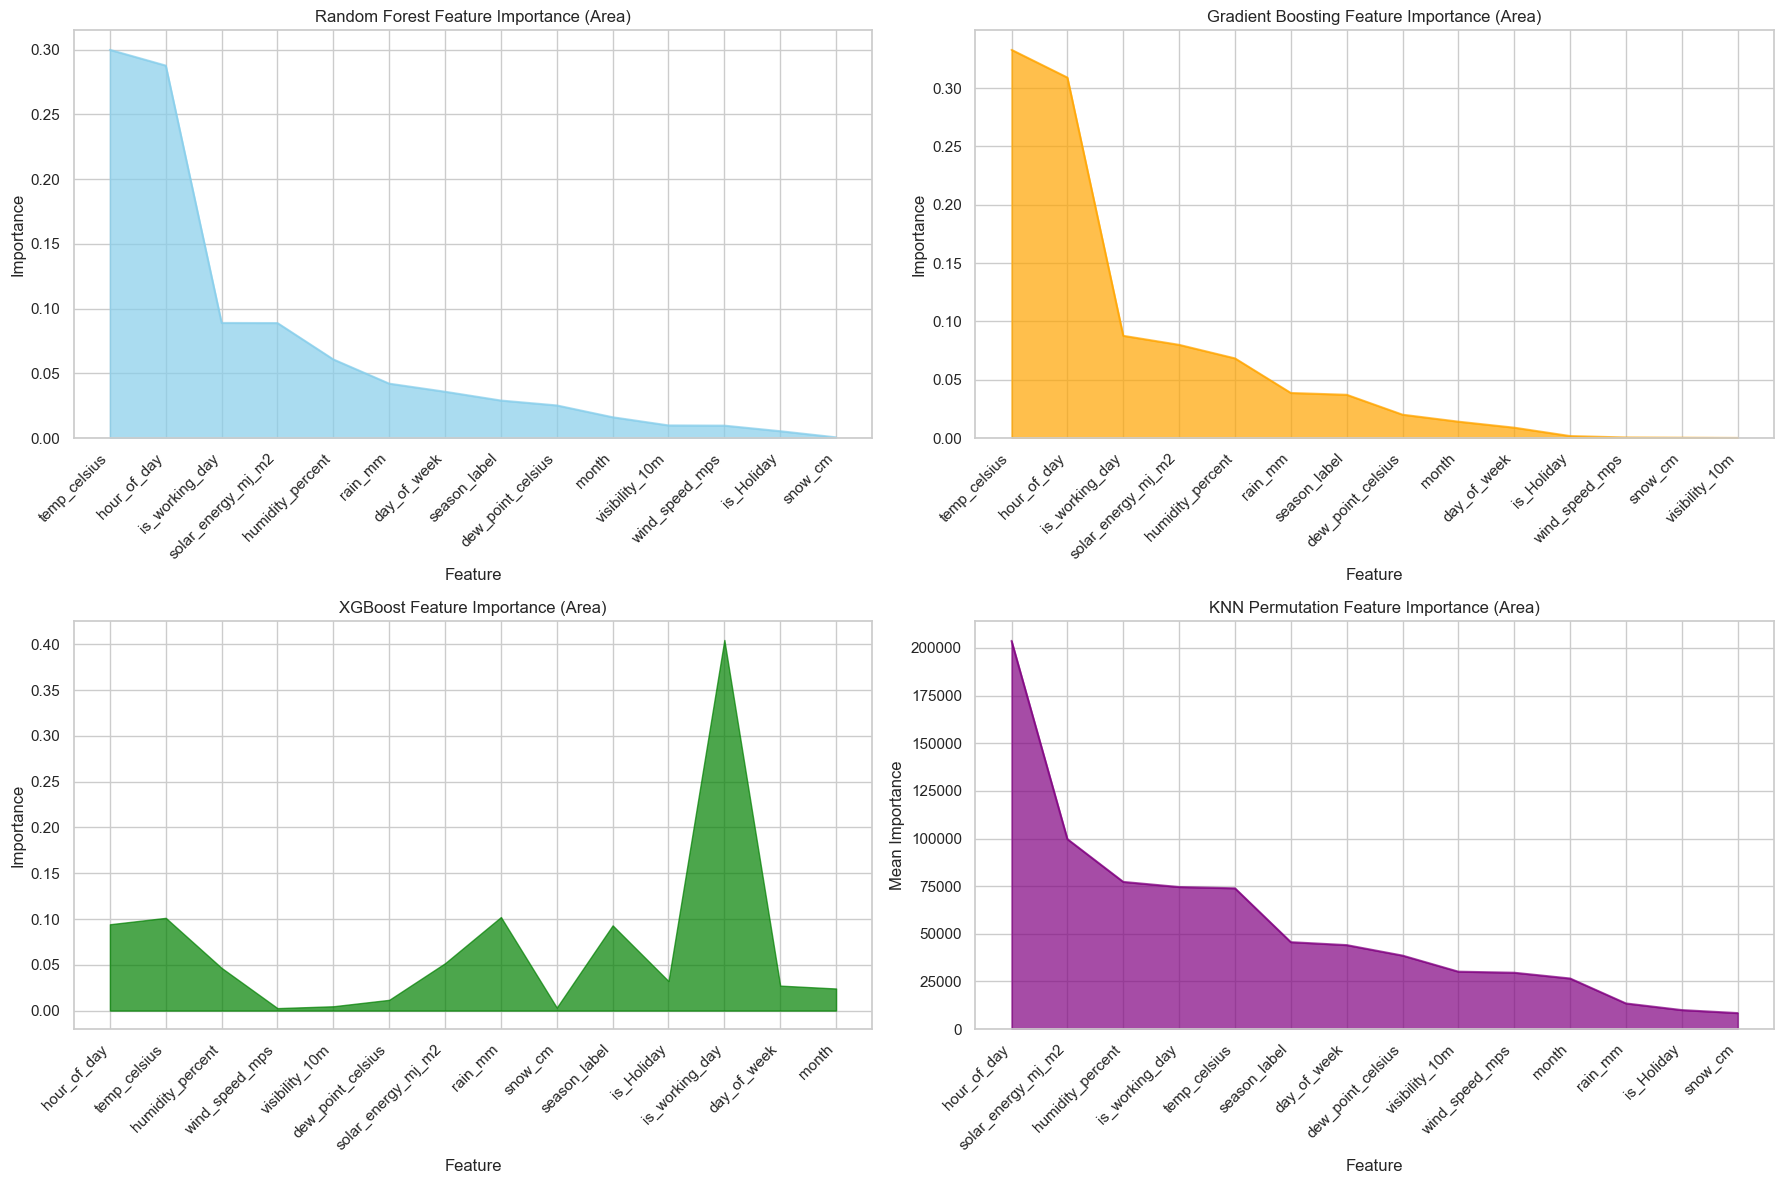

In [41]:
plt.figure(figsize=(18, 12))

# Random Forest Feature Importance
plt.subplot(2, 2, 1)
importances_rf.plot(kind='area', color='skyblue', alpha=0.7)
plt.title('Random Forest Feature Importance (Area)')
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.xticks(ticks=range(len(importances_rf)), labels=importances_rf.index, rotation=45, ha='right')

# Gradient Boosting Feature Importance
plt.subplot(2, 2, 2)
importances_gbr.plot(kind='area', color='orange', alpha=0.7)
plt.title('Gradient Boosting Feature Importance (Area)')
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.xticks(ticks=range(len(importances_gbr)), labels=importances_gbr.index, rotation=45, ha='right')

# XGBoost Feature Importance
plt.subplot(2, 2, 3)
plt.fill_between(range(len(features)), xgb.feature_importances_, color='green', alpha=0.7)
plt.title('XGBoost Feature Importance (Area)')
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.xticks(ticks=range(len(features)), labels=features, rotation=45, ha='right')

# KNN Permutation Feature Importance
plt.subplot(2, 2, 4)
importances_knn.sort_values(ascending=False).plot(kind='area', color='purple', alpha=0.7)
plt.title('KNN Permutation Feature Importance (Area)')
plt.ylabel('Mean Importance')
plt.xlabel('Feature')
plt.xticks(ticks=range(len(importances_knn)), labels=importances_knn.sort_values(ascending=False).index, rotation=45, ha='right')

plt.tight_layout()
plt.show()

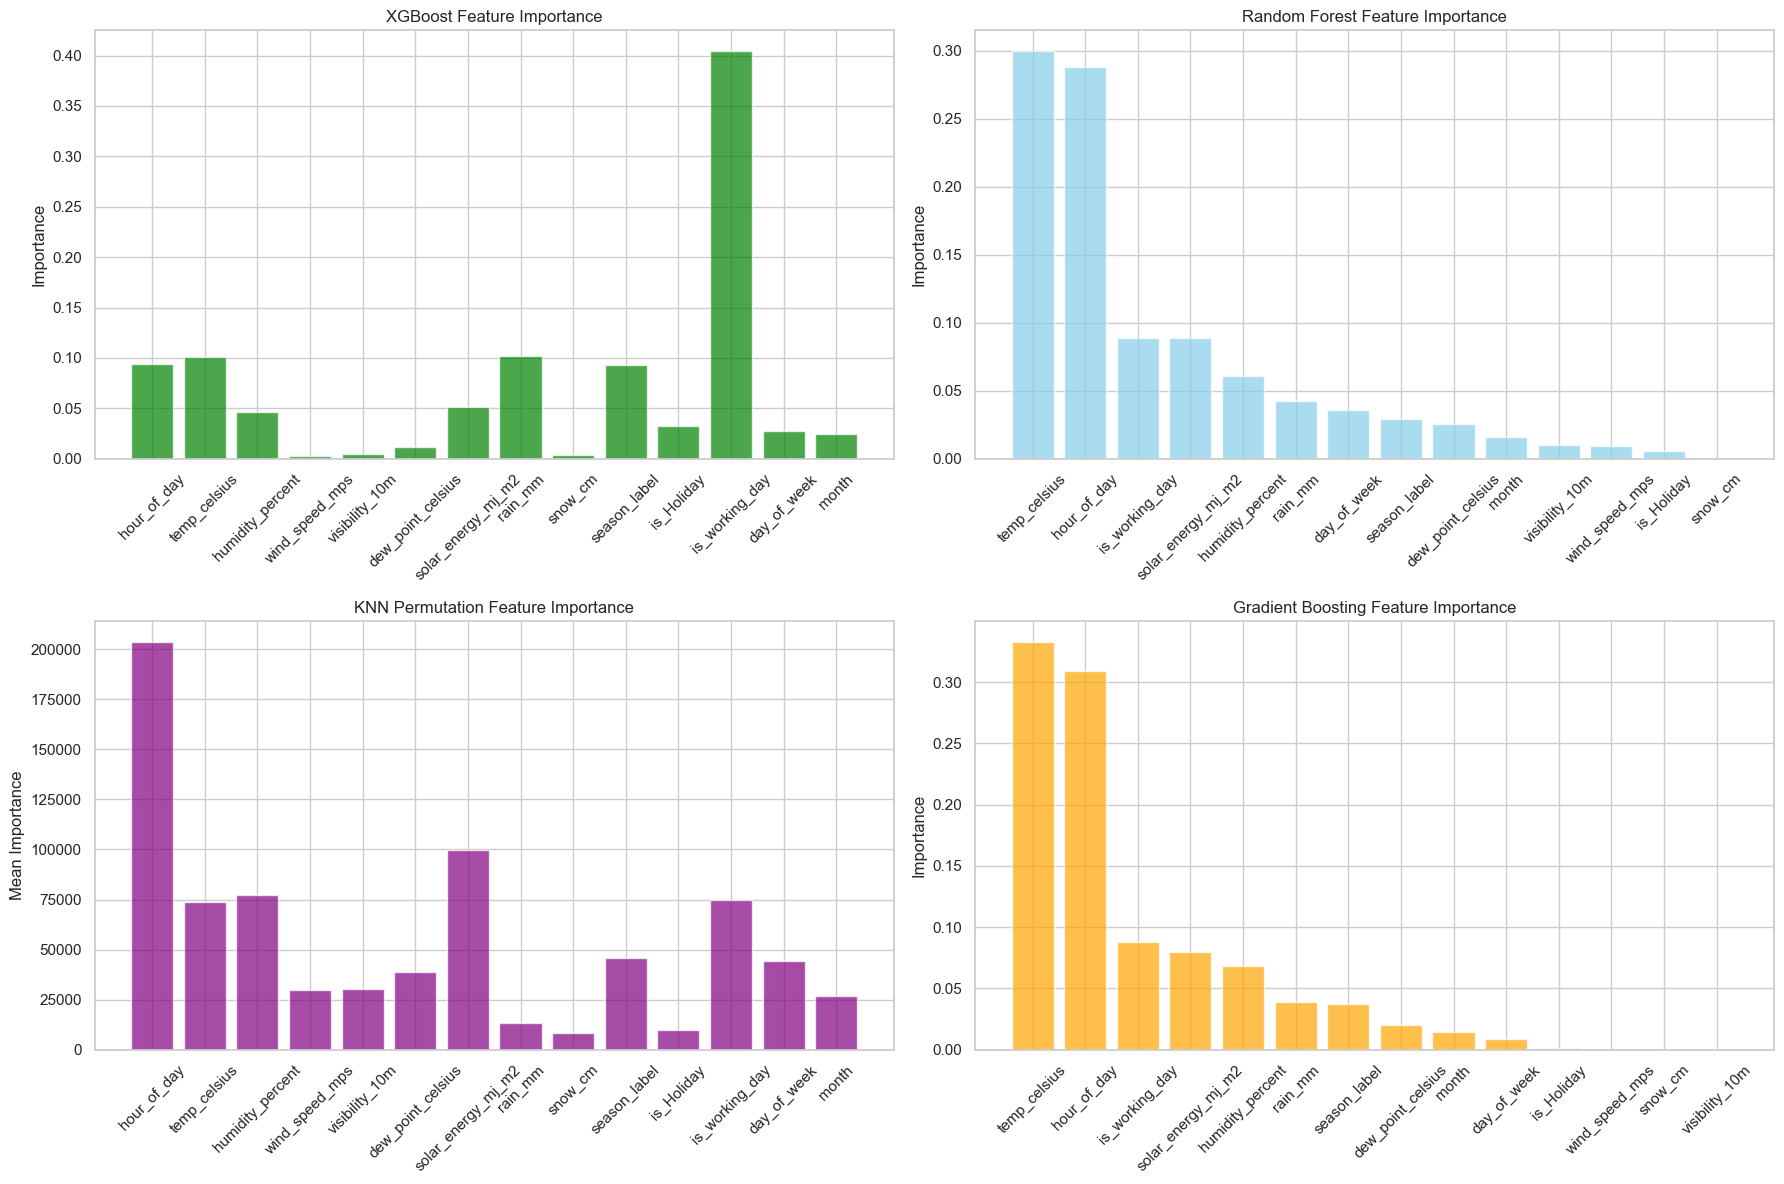

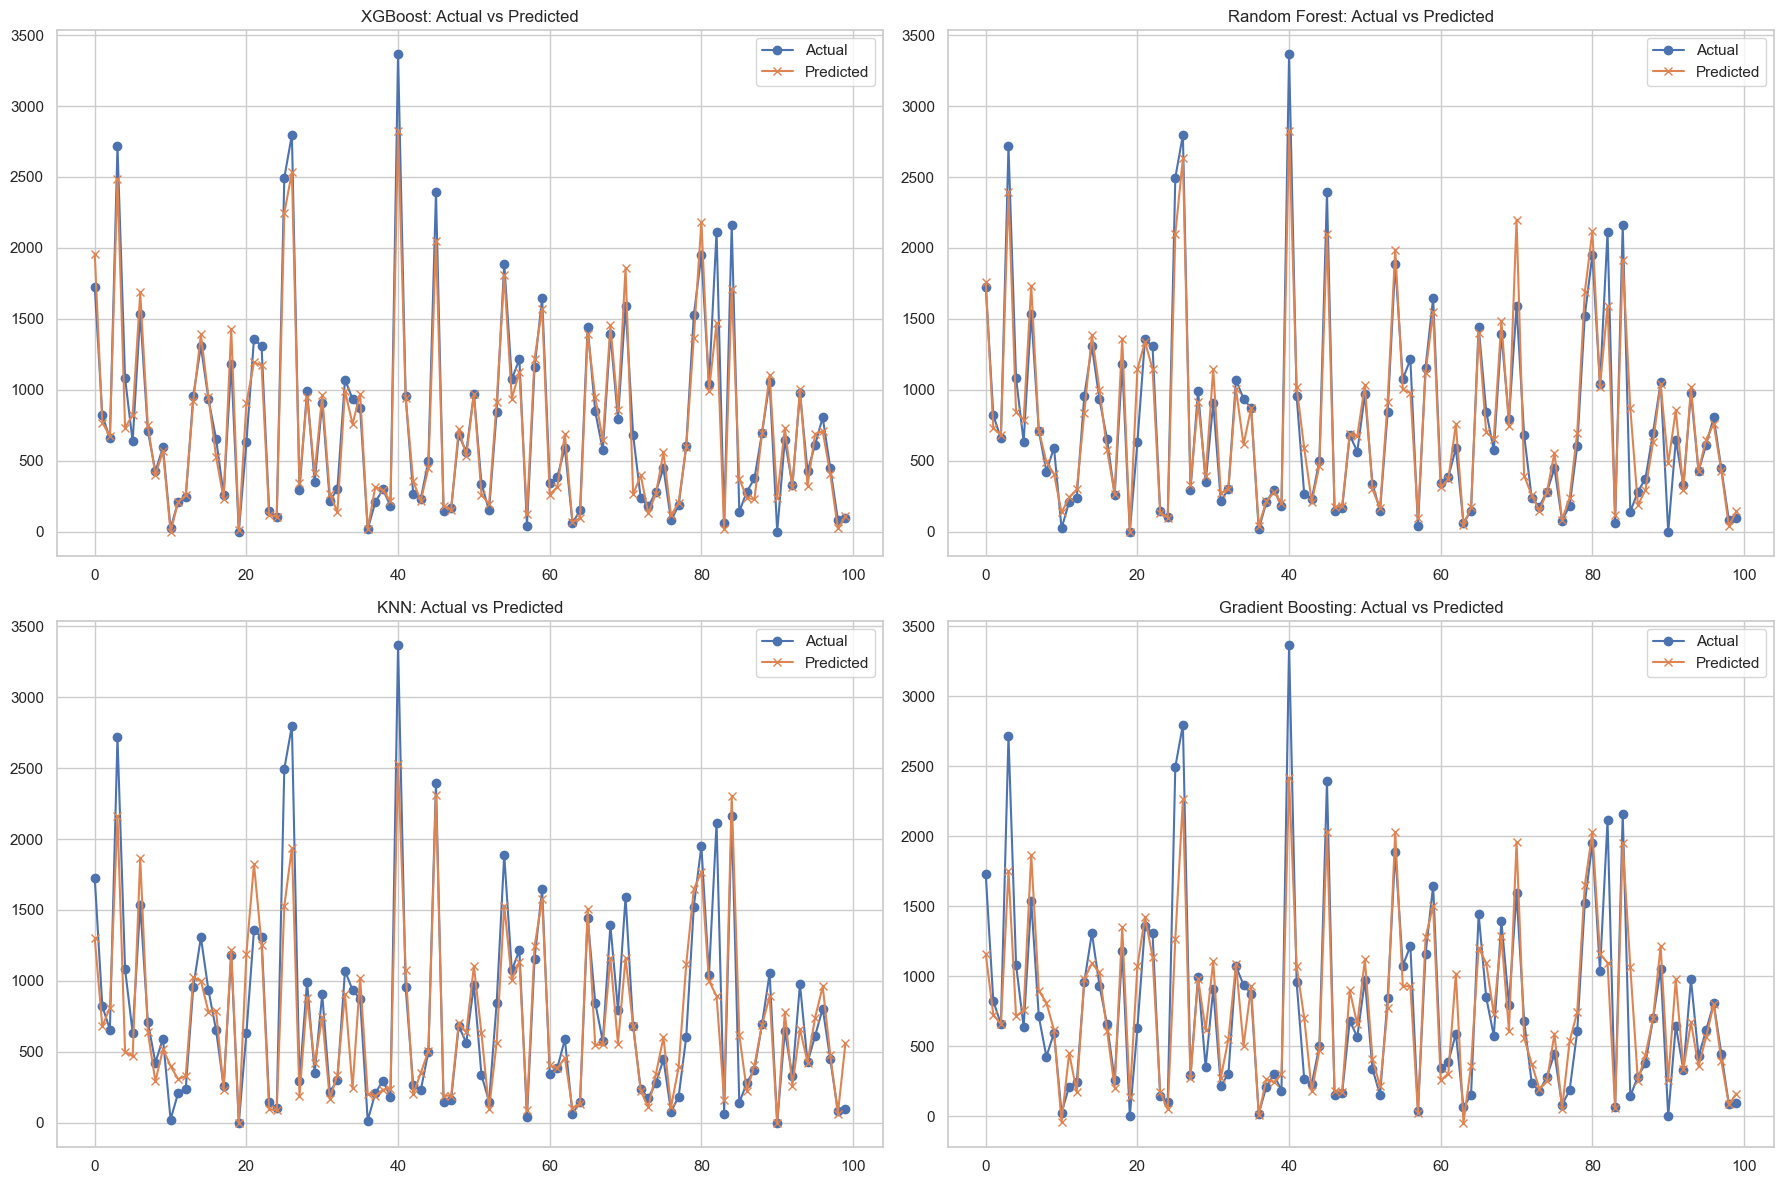

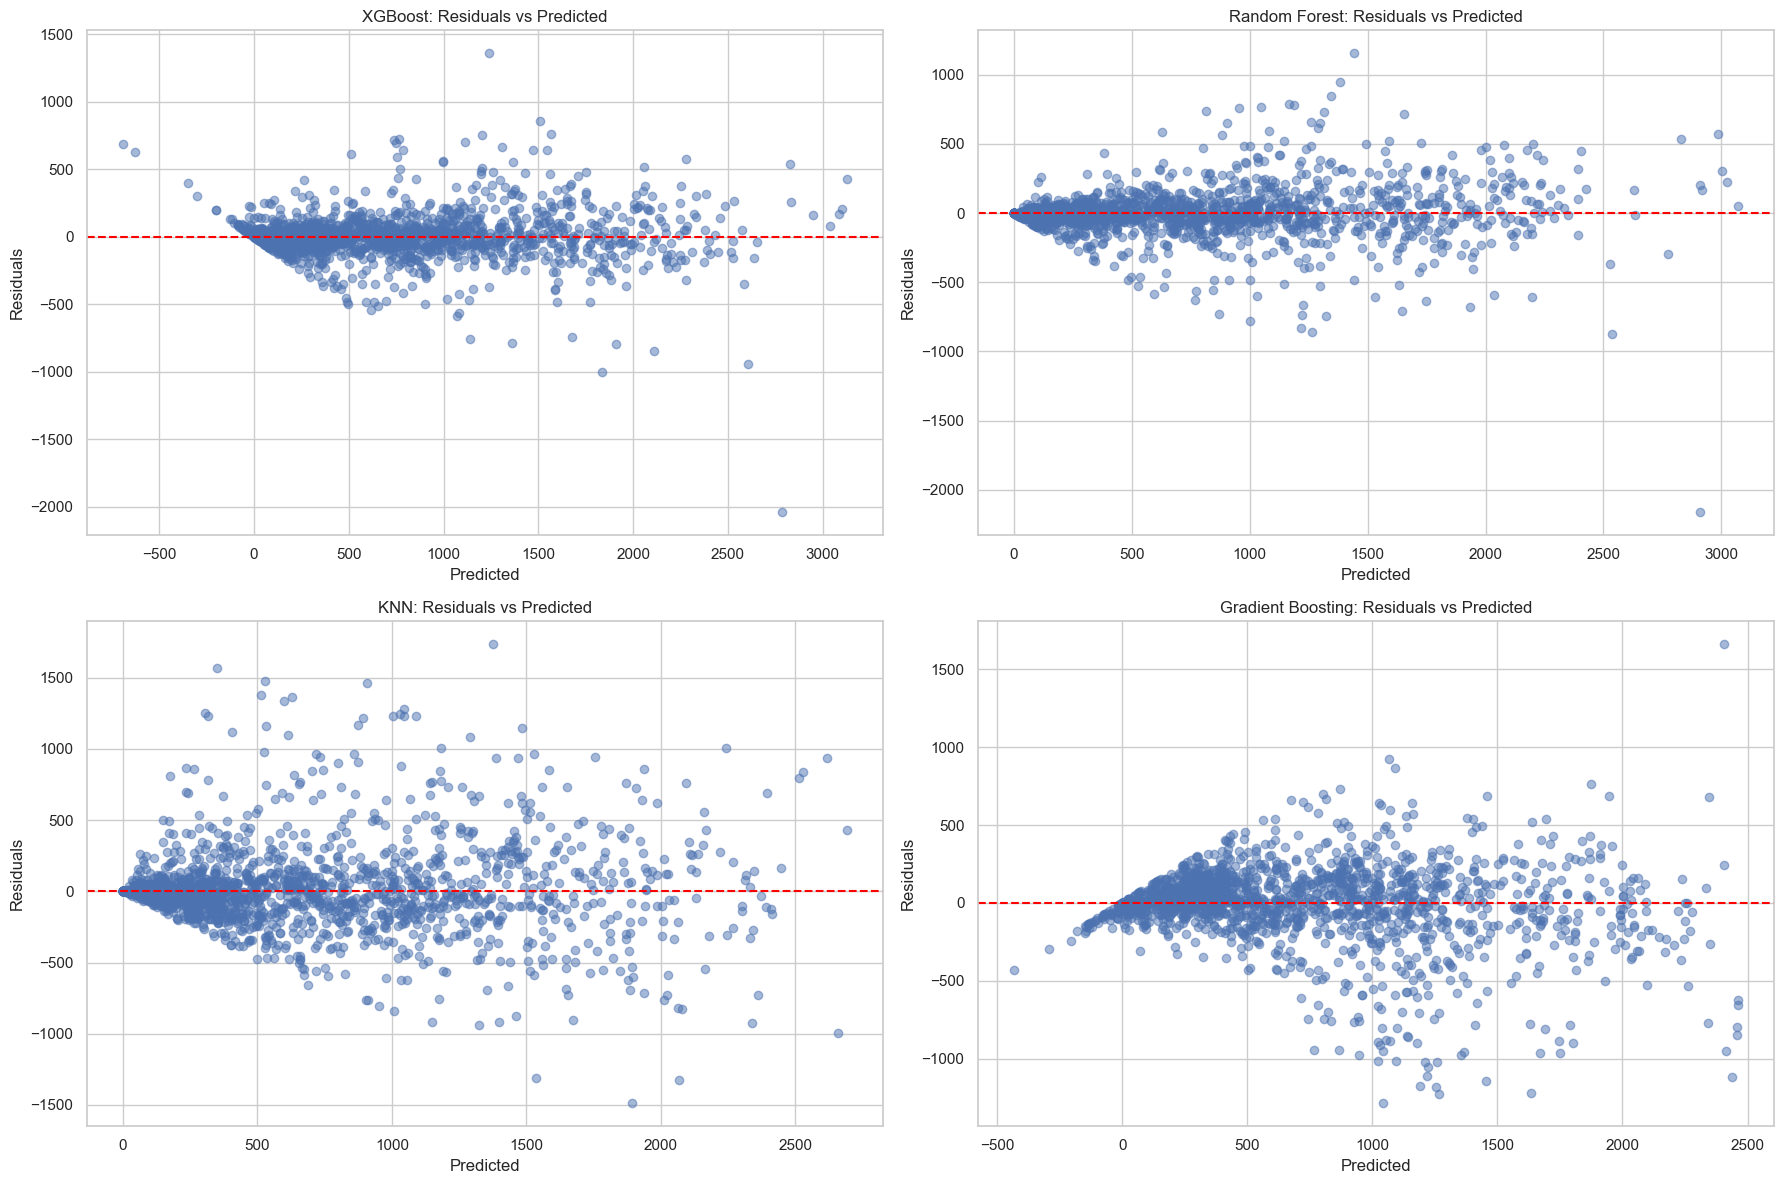

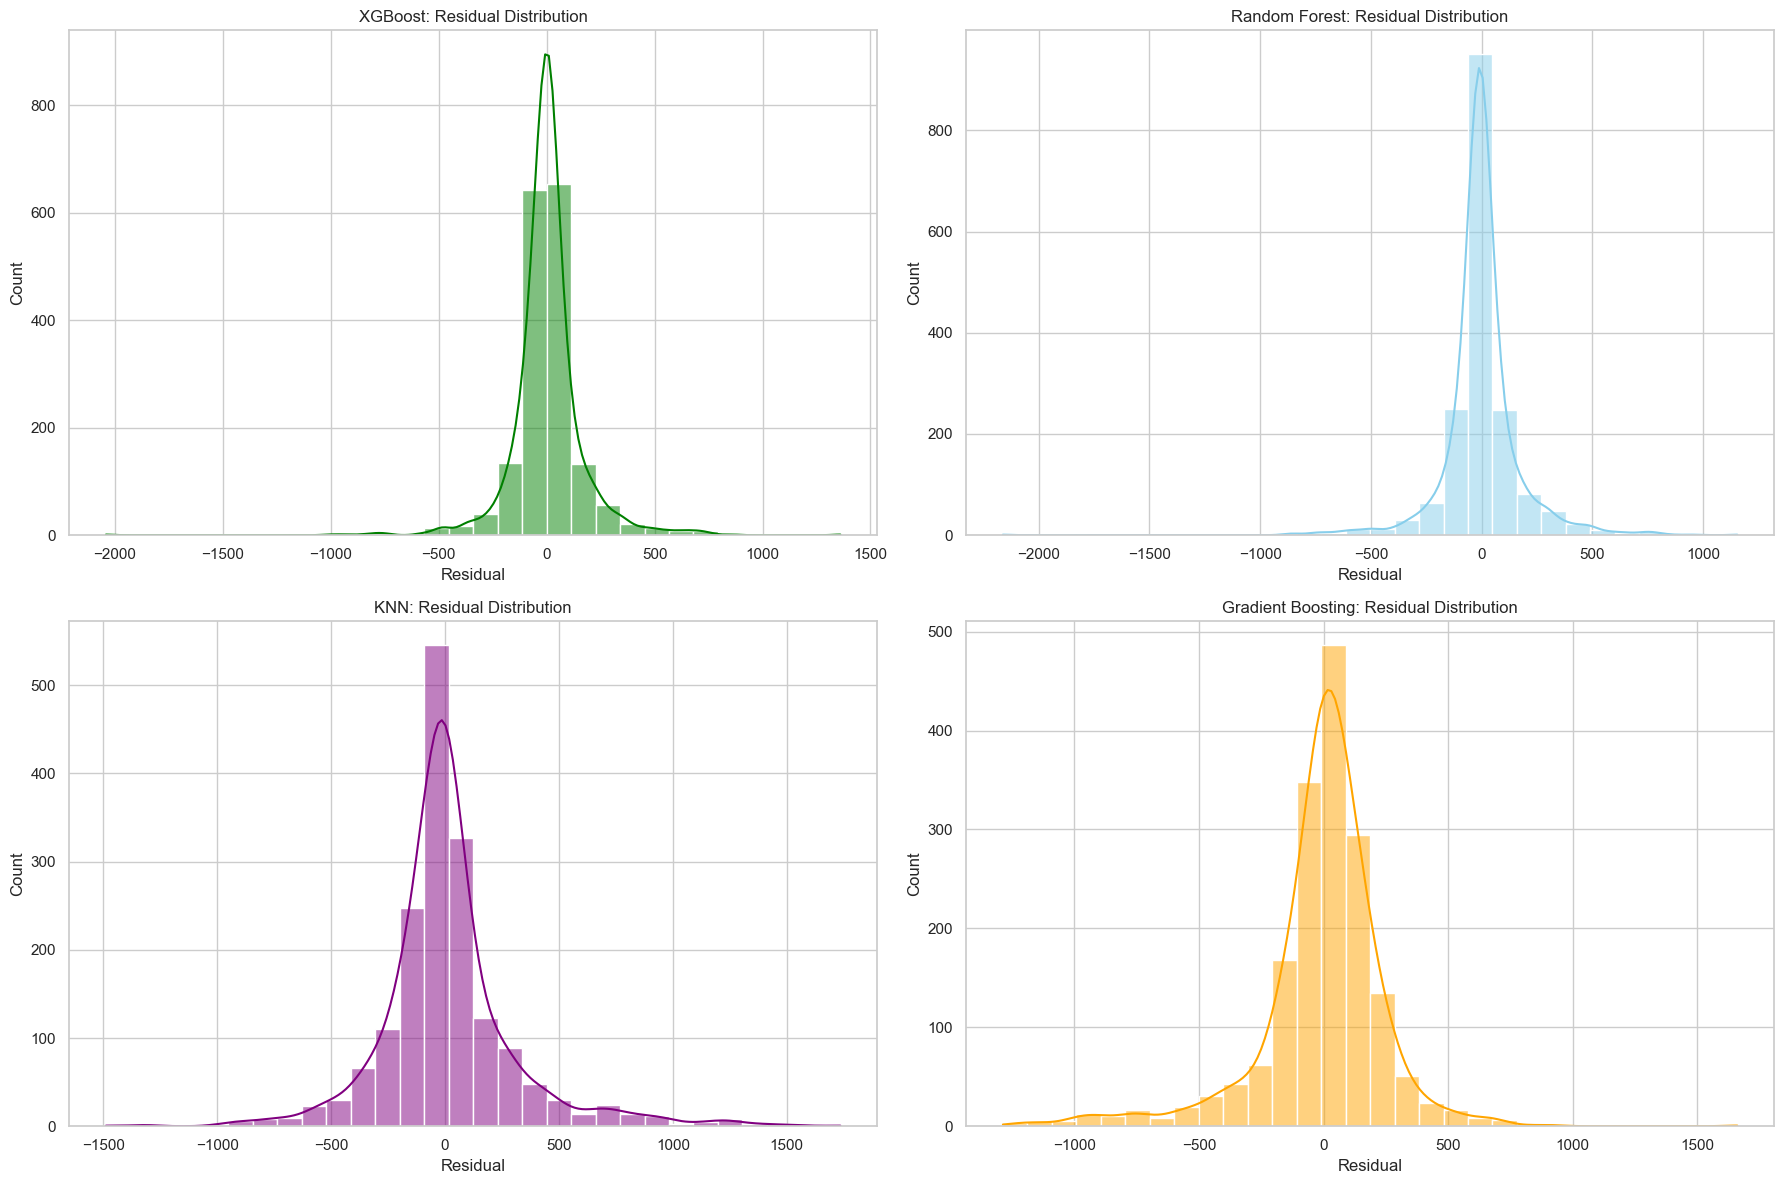

In [42]:
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

# --- Feature Importance Bar Graphs ---
# XGBoost
axs[0, 0].bar(features, xgb.feature_importances_, color='green', alpha=0.7)
axs[0, 0].set_title('XGBoost Feature Importance')
axs[0, 0].set_ylabel('Importance')
axs[0, 0].tick_params(axis='x', rotation=45)

# Random Forest
axs[0, 1].bar(importances_rf.index, importances_rf.values, color='skyblue', alpha=0.7)
axs[0, 1].set_title('Random Forest Feature Importance')
axs[0, 1].set_ylabel('Importance')
axs[0, 1].tick_params(axis='x', rotation=45)

# KNN (Permutation Importance)
axs[1, 0].bar(importances_knn.index, importances_knn.values, color='purple', alpha=0.7)
axs[1, 0].set_title('KNN Permutation Feature Importance')
axs[1, 0].set_ylabel('Mean Importance')
axs[1, 0].tick_params(axis='x', rotation=45)

# Gradient Boosting
axs[1, 1].bar(importances_gbr.index, importances_gbr.values, color='orange', alpha=0.7)
axs[1, 1].set_title('Gradient Boosting Feature Importance')
axs[1, 1].set_ylabel('Importance')
axs[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# --- Actual vs Predicted Plots ---
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

axs[0, 0].plot(y_test.values[:100], label='Actual', marker='o')
axs[0, 0].plot(y_pred_xgb[:100], label='Predicted', marker='x')
axs[0, 0].set_title('XGBoost: Actual vs Predicted')
axs[0, 0].legend()
axs[0, 0].grid(True)

axs[0, 1].plot(y_test.values[:100], label='Actual', marker='o')
axs[0, 1].plot(y_pred_rf[:100], label='Predicted', marker='x')
axs[0, 1].set_title('Random Forest: Actual vs Predicted')
axs[0, 1].legend()
axs[0, 1].grid(True)

axs[1, 0].plot(y_test.values[:100], label='Actual', marker='o')
axs[1, 0].plot(y_pred_knn[:100], label='Predicted', marker='x')
axs[1, 0].set_title('KNN: Actual vs Predicted')
axs[1, 0].legend()
axs[1, 0].grid(True)

axs[1, 1].plot(y_test.values[:100], label='Actual', marker='o')
axs[1, 1].plot(y_pred_gbr[:100], label='Predicted', marker='x')
axs[1, 1].set_title('Gradient Boosting: Actual vs Predicted')
axs[1, 1].legend()
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()

# --- Residual Plots ---
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

axs[0, 0].scatter(y_pred_xgb, residuals_xgb, alpha=0.5)
axs[0, 0].axhline(0, color='red', linestyle='--')
axs[0, 0].set_title('XGBoost: Residuals vs Predicted')
axs[0, 0].set_xlabel('Predicted')
axs[0, 0].set_ylabel('Residuals')
axs[0, 0].grid(True)

axs[0, 1].scatter(y_pred_rf, residuals_rf, alpha=0.5)
axs[0, 1].axhline(0, color='red', linestyle='--')
axs[0, 1].set_title('Random Forest: Residuals vs Predicted')
axs[0, 1].set_xlabel('Predicted')
axs[0, 1].set_ylabel('Residuals')
axs[0, 1].grid(True)

axs[1, 0].scatter(y_pred_knn, residuals_knn, alpha=0.5)
axs[1, 0].axhline(0, color='red', linestyle='--')
axs[1, 0].set_title('KNN: Residuals vs Predicted')
axs[1, 0].set_xlabel('Predicted')
axs[1, 0].set_ylabel('Residuals')
axs[1, 0].grid(True)

axs[1, 1].scatter(y_pred_gbr, y_pred_gbr - y_test, alpha=0.5)
axs[1, 1].axhline(0, color='red', linestyle='--')
axs[1, 1].set_title('Gradient Boosting: Residuals vs Predicted')
axs[1, 1].set_xlabel('Predicted')
axs[1, 1].set_ylabel('Residuals')
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()

# --- Residual Distribution Plots ---
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

sns.histplot(residuals_xgb, bins=30, kde=True, ax=axs[0, 0], color='green')
axs[0, 0].set_title('XGBoost: Residual Distribution')
axs[0, 0].set_xlabel('Residual')

sns.histplot(residuals_rf, bins=30, kde=True, ax=axs[0, 1], color='skyblue')
axs[0, 1].set_title('Random Forest: Residual Distribution')
axs[0, 1].set_xlabel('Residual')

sns.histplot(residuals_knn, bins=30, kde=True, ax=axs[1, 0], color='purple')
axs[1, 0].set_title('KNN: Residual Distribution')
axs[1, 0].set_xlabel('Residual')

sns.histplot(y_pred_gbr - y_test, bins=30, kde=True, ax=axs[1, 1], color='orange')
axs[1, 1].set_title('Gradient Boosting: Residual Distribution')
axs[1, 1].set_xlabel('Residual')

plt.tight_layout()
plt.show()